---
execute:
  cache: false
  eval: true
  echo: true
  warning: false
jupyter: python3
---


# Pytorch Lightning: Hyperparameter Tuning with Diabetes Data


In [1]:
#| echo: false
#| label: 601_imports
import numpy as np
import os
from math import inf
import numpy as np
import warnings
if not os.path.exists('./figures'):
    os.makedirs('./figures')
warnings.filterwarnings("ignore")

In this tutorial, we will show how `spotpython` can be integrated into the `PyTorch` Lightning
training workflow for a regression task.
It demonstrates how easy it is to use `spotpython` to tune hyperparameters for a `PyTorch` Lightning model.


In [2]:
#| label: 601_setup
from spotpython.data.diabetes import Diabetes
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.fun.hyperlight import HyperLight
from spotpython.utils.init import (fun_control_init, surrogate_control_init)
from spotpython.utils.eda import gen_design_table
from spotpython.hyperparameters.values import set_hyperparameter
from spotpython.spot import spot


fun_control = fun_control_init(
    PREFIX="601",
    fun_evals=inf,
    max_time=1,
    data_set = Diabetes(),
    core_model_name="light.regression.NNLinearRegressor",
    hyperdict=LightHyperDict,
    _L_in=10,
    _L_out=1,
    _torchmetric="mean_squared_error",
    TENSORBOARD_CLEAN=True,)

surrogate_control = surrogate_control_init(n_theta=2, noise=True, min_Lambda=1e-3, max_Lambda=10)

set_hyperparameter(fun_control, "initialization", ["Default"])

fun = HyperLight().fun

spot_tuner = spot.Spot(fun=fun,fun_control=fun_control,surrogate_control=surrogate_control)

Seed set to 123


Seed set to 123


Moving TENSORBOARD_PATH: runs/ to TENSORBOARD_PATH_OLD: runs_OLD/runs_2024_09_11_11_26_10
module_name: light
submodule_name: regression
model_name: NNLinearRegressor


After importing the necessary libraries, the `fun_control` dictionary is set up.
The `fun_control` dictionary contains

* `PREFIX`: a unique identifier for the experiment
* `fun_evals`: the number of function evaluations
* `max_time`: the maximum run time in minutes
* `data_set`: the data set
* `core_model_name`: the class name of the neural network model
* `hyperdict`: the hyperparameter dictionary
* `_L_in`: the number of input features
* `_L_out`: the number of output features

The method `set_hyperparameter` allows the user to modify default hyperparameter settings. Here we set the `initialization` method to `["Default"]`.
The `HyperLight` class is used to define the objective function `fun`. It connects the `PyTorch` and the `spotpython` methods.
Finally, a `Spot` object is created, which is used to run the hyperparameter tuning experiment as follows:
After the hyperparameter tuning run is finished, results results can be printed in tabular form.


GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 425    | train | [16, 10] | [16, 1]  
---------------------------------------------------------------------
425       Trainable params
0         Non-trainable params
425       Total params
0.002     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


LightDataModule.setup(): stage: TrainerFn.FITTING
train_size: 0.36, val_size: 0.24 used for train & val data.
LightDataModule.val_dataloader(). Val. set size: 106
LightDataModule.train_dataloader(). data_train size: 160


LightDataModule.setup(): stage: TrainerFn.VALIDATING
LightDataModule.val_dataloader(). Val. set size: 106


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         hp_metric         │     2950.782470703125     │
│         val_loss          │     2950.782470703125     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 15.9 K | train | [16, 10] | [16, 1]  
---------------------------------------------------------------------
15.9 K    Trainable params
0         Non-trainable params
15.9 K    Total params
0.064     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


train_model result: {'val_loss': 2950.782470703125, 'hp_metric': 2950.782470703125}
LightDataModule.setup(): stage: TrainerFn.FITTING
train_size: 0.36, val_size: 0.24 used for train & val data.
LightDataModule.val_dataloader(). Val. set size: 106
LightDataModule.train_dataloader(). data_train size: 160


LightDataModule.setup(): stage: TrainerFn.VALIDATING
LightDataModule.val_dataloader(). Val. set size: 106


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         hp_metric         │            nan            │
│         val_loss          │            nan            │
└───────────────────────────┴───────────────────────────┘

GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 157    | train | [2, 10]  | [2, 1]   
---------------------------------------------------------------------
157       Trainable params
0         Non-trainable params
157       Total params
0.001     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


train_model result: {'val_loss': nan, 'hp_metric': nan}
LightDataModule.setup(): stage: TrainerFn.FITTING
train_size: 0.36, val_size: 0.24 used for train & val data.
LightDataModule.val_dataloader(). Val. set size: 106
LightDataModule.train_dataloader(). data_train size: 160


LightDataModule.setup(): stage: TrainerFn.VALIDATING
LightDataModule.val_dataloader(). Val. set size: 106


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         hp_metric         │      4877.615234375       │
│         val_loss          │      4877.615234375       │
└───────────────────────────┴───────────────────────────┘

GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 425    | train | [8, 10]  | [8, 1]   
---------------------------------------------------------------------
425       Trainable params
0         Non-trainable params
425       Total params
0.002     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


train_model result: {'val_loss': 4877.615234375, 'hp_metric': 4877.615234375}
LightDataModule.setup(): stage: TrainerFn.FITTING
train_size: 0.36, val_size: 0.24 used for train & val data.
LightDataModule.val_dataloader(). Val. set size: 106
LightDataModule.train_dataloader(). data_train size: 160


`Trainer.fit` stopped: `max_epochs=32` reached.


LightDataModule.setup(): stage: TrainerFn.VALIDATING
LightDataModule.val_dataloader(). Val. set size: 106


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         hp_metric         │      22249.115234375      │
│         val_loss          │      22249.115234375      │
└───────────────────────────┴───────────────────────────┘

GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 4.4 K  | train | [8, 10]  | [8, 1]   
---------------------------------------------------------------------
4.4 K     Trainable params
0         Non-trainable params
4.4 K     Total params
0.018     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


train_model result: {'val_loss': 22249.115234375, 'hp_metric': 22249.115234375}
LightDataModule.setup(): stage: TrainerFn.FITTING
train_size: 0.36, val_size: 0.24 used for train & val data.
LightDataModule.val_dataloader(). Val. set size: 106
LightDataModule.train_dataloader(). data_train size: 160


`Trainer.fit` stopped: `max_epochs=128` reached.


LightDataModule.setup(): stage: TrainerFn.VALIDATING
LightDataModule.val_dataloader(). Val. set size: 106


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         hp_metric         │      15807.353515625      │
│         val_loss          │      15807.353515625      │
└───────────────────────────┴───────────────────────────┘

GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 1.3 K  | train | [8, 10]  | [8, 1]   
---------------------------------------------------------------------
1.3 K     Trainable params
0         Non-trainable params
1.3 K     Total params
0.005     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


train_model result: {'val_loss': 15807.353515625, 'hp_metric': 15807.353515625}
LightDataModule.setup(): stage: TrainerFn.FITTING
train_size: 0.36, val_size: 0.24 used for train & val data.
LightDataModule.val_dataloader(). Val. set size: 106
LightDataModule.train_dataloader(). data_train size: 160


LightDataModule.setup(): stage: TrainerFn.VALIDATING
LightDataModule.val_dataloader(). Val. set size: 106


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         hp_metric         │            nan            │
│         val_loss          │            nan            │
└───────────────────────────┴───────────────────────────┘

GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 15.9 K | train | [4, 10]  | [4, 1]   
---------------------------------------------------------------------
15.9 K    Trainable params
0         Non-trainable params
15.9 K    Total params
0.064     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


train_model result: {'val_loss': nan, 'hp_metric': nan}
LightDataModule.setup(): stage: TrainerFn.FITTING
train_size: 0.36, val_size: 0.24 used for train & val data.
LightDataModule.val_dataloader(). Val. set size: 106
LightDataModule.train_dataloader(). data_train size: 160


`Trainer.fit` stopped: `max_epochs=32` reached.


LightDataModule.setup(): stage: TrainerFn.VALIDATING
LightDataModule.val_dataloader(). Val. set size: 106


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         hp_metric         │      3561.111328125       │
│         val_loss          │      3561.111328125       │
└───────────────────────────┴───────────────────────────┘

GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 1.3 K  | train | [4, 10]  | [4, 1]   
---------------------------------------------------------------------
1.3 K     Trainable params
0         Non-trainable params
1.3 K     Total params
0.005     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


train_model result: {'val_loss': 3561.111328125, 'hp_metric': 3561.111328125}
LightDataModule.setup(): stage: TrainerFn.FITTING
train_size: 0.36, val_size: 0.24 used for train & val data.
LightDataModule.val_dataloader(). Val. set size: 106
LightDataModule.train_dataloader(). data_train size: 160


`Trainer.fit` stopped: `max_epochs=16` reached.


LightDataModule.setup(): stage: TrainerFn.VALIDATING
LightDataModule.val_dataloader(). Val. set size: 106


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         hp_metric         │      3513.9931640625      │
│         val_loss          │      3513.9931640625      │
└───────────────────────────┴───────────────────────────┘

GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 4.4 K  | train | [4, 10]  | [4, 1]   
---------------------------------------------------------------------
4.4 K     Trainable params
0         Non-trainable params
4.4 K     Total params
0.018     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


train_model result: {'val_loss': 3513.9931640625, 'hp_metric': 3513.9931640625}
LightDataModule.setup(): stage: TrainerFn.FITTING
train_size: 0.36, val_size: 0.24 used for train & val data.
LightDataModule.val_dataloader(). Val. set size: 106
LightDataModule.train_dataloader(). data_train size: 160


LightDataModule.setup(): stage: TrainerFn.VALIDATING
LightDataModule.val_dataloader(). Val. set size: 106


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         hp_metric         │     3265.287841796875     │
│         val_loss          │     3265.287841796875     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 60.5 K | train | [4, 10]  | [4, 1]   
---------------------------------------------------------------------
60.5 K    Trainable params
0         Non-trainable params
60.5 K    Total params
0.242     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


train_model result: {'val_loss': 3265.287841796875, 'hp_metric': 3265.287841796875}
LightDataModule.setup(): stage: TrainerFn.FITTING
train_size: 0.36, val_size: 0.24 used for train & val data.
LightDataModule.val_dataloader(). Val. set size: 106
LightDataModule.train_dataloader(). data_train size: 160


LightDataModule.setup(): stage: TrainerFn.VALIDATING
LightDataModule.val_dataloader(). Val. set size: 106


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         hp_metric         │      4673.6005859375      │
│         val_loss          │      4673.6005859375      │
└───────────────────────────┴───────────────────────────┘

train_model result: {'val_loss': 4673.6005859375, 'hp_metric': 4673.6005859375}


GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 157    | train | [4, 10]  | [4, 1]   
---------------------------------------------------------------------
157       Trainable params
0         Non-trainable params
157       Total params
0.001     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


LightDataModule.setup(): stage: TrainerFn.FITTING
train_size: 0.36, val_size: 0.24 used for train & val data.
LightDataModule.val_dataloader(). Val. set size: 106
LightDataModule.train_dataloader(). data_train size: 160


`Trainer.fit` stopped: `max_epochs=16` reached.


LightDataModule.setup(): stage: TrainerFn.VALIDATING
LightDataModule.val_dataloader(). Val. set size: 106


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         hp_metric         │        24187.59375        │
│         val_loss          │        24187.59375        │
└───────────────────────────┴───────────────────────────┘

train_model result: {'val_loss': 24187.59375, 'hp_metric': 24187.59375}
spotpython tuning: 2950.782470703125 [#---------] 6.97% 


GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 157    | train | [4, 10]  | [4, 1]   
---------------------------------------------------------------------
157       Trainable params
0         Non-trainable params
157       Total params
0.001     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


LightDataModule.setup(): stage: TrainerFn.FITTING
train_size: 0.36, val_size: 0.24 used for train & val data.
LightDataModule.val_dataloader(). Val. set size: 106
LightDataModule.train_dataloader(). data_train size: 160


`Trainer.fit` stopped: `max_epochs=16` reached.


LightDataModule.setup(): stage: TrainerFn.VALIDATING
LightDataModule.val_dataloader(). Val. set size: 106


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         hp_metric         │      24098.908203125      │
│         val_loss          │      24098.908203125      │
└───────────────────────────┴───────────────────────────┘

train_model result: {'val_loss': 24098.908203125, 'hp_metric': 24098.908203125}
spotpython tuning: 2950.782470703125 [#---------] 14.58% 


GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 4.4 K  | train | [4, 10]  | [4, 1]   
---------------------------------------------------------------------
4.4 K     Trainable params
0         Non-trainable params
4.4 K     Total params
0.018     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


LightDataModule.setup(): stage: TrainerFn.FITTING
train_size: 0.36, val_size: 0.24 used for train & val data.
LightDataModule.val_dataloader(). Val. set size: 106
LightDataModule.train_dataloader(). data_train size: 160


`Trainer.fit` stopped: `max_epochs=16` reached.


LightDataModule.setup(): stage: TrainerFn.VALIDATING
LightDataModule.val_dataloader(). Val. set size: 106


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         hp_metric         │     3368.782958984375     │
│         val_loss          │     3368.782958984375     │
└───────────────────────────┴───────────────────────────┘

train_model result: {'val_loss': 3368.782958984375, 'hp_metric': 3368.782958984375}
spotpython tuning: 2950.782470703125 [##--------] 21.63% 


GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 425    | train | [16, 10] | [16, 1]  
---------------------------------------------------------------------
425       Trainable params
0         Non-trainable params
425       Total params
0.002     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


LightDataModule.setup(): stage: TrainerFn.FITTING
train_size: 0.36, val_size: 0.24 used for train & val data.
LightDataModule.val_dataloader(). Val. set size: 106
LightDataModule.train_dataloader(). data_train size: 160


LightDataModule.setup(): stage: TrainerFn.VALIDATING
LightDataModule.val_dataloader(). Val. set size: 106


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         hp_metric         │     4216.19970703125      │
│         val_loss          │     4216.19970703125      │
└───────────────────────────┴───────────────────────────┘

train_model result: {'val_loss': 4216.19970703125, 'hp_metric': 4216.19970703125}
spotpython tuning: 2950.782470703125 [##--------] 23.75% 


GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 4.4 K  | train | [4, 10]  | [4, 1]   
---------------------------------------------------------------------
4.4 K     Trainable params
0         Non-trainable params
4.4 K     Total params
0.018     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


LightDataModule.setup(): stage: TrainerFn.FITTING
train_size: 0.36, val_size: 0.24 used for train & val data.
LightDataModule.val_dataloader(). Val. set size: 106
LightDataModule.train_dataloader(). data_train size: 160


`Trainer.fit` stopped: `max_epochs=32` reached.


LightDataModule.setup(): stage: TrainerFn.VALIDATING
LightDataModule.val_dataloader(). Val. set size: 106


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         hp_metric         │     4029.70751953125      │
│         val_loss          │     4029.70751953125      │
└───────────────────────────┴───────────────────────────┘

train_model result: {'val_loss': 4029.70751953125, 'hp_metric': 4029.70751953125}
spotpython tuning: 2950.782470703125 [####------] 37.16% 


GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 4.4 K  | train | [4, 10]  | [4, 1]   
---------------------------------------------------------------------
4.4 K     Trainable params
0         Non-trainable params
4.4 K     Total params
0.018     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


LightDataModule.setup(): stage: TrainerFn.FITTING
train_size: 0.36, val_size: 0.24 used for train & val data.
LightDataModule.val_dataloader(). Val. set size: 106
LightDataModule.train_dataloader(). data_train size: 160


LightDataModule.setup(): stage: TrainerFn.VALIDATING
LightDataModule.val_dataloader(). Val. set size: 106


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         hp_metric         │       4084.16796875       │
│         val_loss          │       4084.16796875       │
└───────────────────────────┴───────────────────────────┘

train_model result: {'val_loss': 4084.16796875, 'hp_metric': 4084.16796875}
spotpython tuning: 2950.782470703125 [####------] 42.04% 


GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 4.4 K  | train | [4, 10]  | [4, 1]   
---------------------------------------------------------------------
4.4 K     Trainable params
0         Non-trainable params
4.4 K     Total params
0.018     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


LightDataModule.setup(): stage: TrainerFn.FITTING
train_size: 0.36, val_size: 0.24 used for train & val data.
LightDataModule.val_dataloader(). Val. set size: 106
LightDataModule.train_dataloader(). data_train size: 160


`Trainer.fit` stopped: `max_epochs=16` reached.


LightDataModule.setup(): stage: TrainerFn.VALIDATING
LightDataModule.val_dataloader(). Val. set size: 106


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         hp_metric         │     3365.593505859375     │
│         val_loss          │     3365.593505859375     │
└───────────────────────────┴───────────────────────────┘

train_model result: {'val_loss': 3365.593505859375, 'hp_metric': 3365.593505859375}
spotpython tuning: 2950.782470703125 [#####-----] 48.79% 


GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 4.4 K  | train | [4, 10]  | [4, 1]   
---------------------------------------------------------------------
4.4 K     Trainable params
0         Non-trainable params
4.4 K     Total params
0.018     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


LightDataModule.setup(): stage: TrainerFn.FITTING
train_size: 0.36, val_size: 0.24 used for train & val data.
LightDataModule.val_dataloader(). Val. set size: 106
LightDataModule.train_dataloader(). data_train size: 160


`Trainer.fit` stopped: `max_epochs=16` reached.


LightDataModule.setup(): stage: TrainerFn.VALIDATING
LightDataModule.val_dataloader(). Val. set size: 106


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         hp_metric         │      4497.8779296875      │
│         val_loss          │      4497.8779296875      │
└───────────────────────────┴───────────────────────────┘

train_model result: {'val_loss': 4497.8779296875, 'hp_metric': 4497.8779296875}
spotpython tuning: 2950.782470703125 [######----] 55.79% 


GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 4.4 K  | train | [4, 10]  | [4, 1]   
---------------------------------------------------------------------
4.4 K     Trainable params
0         Non-trainable params
4.4 K     Total params
0.018     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


LightDataModule.setup(): stage: TrainerFn.FITTING
train_size: 0.36, val_size: 0.24 used for train & val data.
LightDataModule.val_dataloader(). Val. set size: 106
LightDataModule.train_dataloader(). data_train size: 160


LightDataModule.setup(): stage: TrainerFn.VALIDATING
LightDataModule.val_dataloader(). Val. set size: 106


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         hp_metric         │      3525.5537109375      │
│         val_loss          │      3525.5537109375      │
└───────────────────────────┴───────────────────────────┘

train_model result: {'val_loss': 3525.5537109375, 'hp_metric': 3525.5537109375}
spotpython tuning: 2950.782470703125 [#######---] 71.70% 


GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 4.4 K  | train | [4, 10]  | [4, 1]   
---------------------------------------------------------------------
4.4 K     Trainable params
0         Non-trainable params
4.4 K     Total params
0.018     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


LightDataModule.setup(): stage: TrainerFn.FITTING
train_size: 0.36, val_size: 0.24 used for train & val data.
LightDataModule.val_dataloader(). Val. set size: 106
LightDataModule.train_dataloader(). data_train size: 160


LightDataModule.setup(): stage: TrainerFn.VALIDATING
LightDataModule.val_dataloader(). Val. set size: 106


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         hp_metric         │            nan            │
│         val_loss          │            nan            │
└───────────────────────────┴───────────────────────────┘

GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 15.9 K | train | [8, 10]  | [8, 1]   
---------------------------------------------------------------------
15.9 K    Trainable params
0         Non-trainable params
15.9 K    Total params
0.064     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


train_model result: {'val_loss': nan, 'hp_metric': nan}
LightDataModule.setup(): stage: TrainerFn.FITTING
train_size: 0.36, val_size: 0.24 used for train & val data.
LightDataModule.val_dataloader(). Val. set size: 106
LightDataModule.train_dataloader(). data_train size: 160


LightDataModule.setup(): stage: TrainerFn.VALIDATING
LightDataModule.val_dataloader(). Val. set size: 106


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         hp_metric         │      3011.912109375       │
│         val_loss          │      3011.912109375       │
└───────────────────────────┴───────────────────────────┘

train_model result: {'val_loss': 3011.912109375, 'hp_metric': 3011.912109375}


spotpython tuning: 2950.782470703125 [#########-] 86.59% 


GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 60.5 K | train | [8, 10]  | [8, 1]   
---------------------------------------------------------------------
60.5 K    Trainable params
0         Non-trainable params
60.5 K    Total params
0.242     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


LightDataModule.setup(): stage: TrainerFn.FITTING
train_size: 0.36, val_size: 0.24 used for train & val data.
LightDataModule.val_dataloader(). Val. set size: 106
LightDataModule.train_dataloader(). data_train size: 160


LightDataModule.setup(): stage: TrainerFn.VALIDATING
LightDataModule.val_dataloader(). Val. set size: 106


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         hp_metric         │     3218.462158203125     │
│         val_loss          │     3218.462158203125     │
└───────────────────────────┴───────────────────────────┘

train_model result: {'val_loss': 3218.462158203125, 'hp_metric': 3218.462158203125}


spotpython tuning: 2950.782470703125 [##########] 98.39% 


GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 15.9 K | train | [8, 10]  | [8, 1]   
---------------------------------------------------------------------
15.9 K    Trainable params
0         Non-trainable params
15.9 K    Total params
0.064     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


LightDataModule.setup(): stage: TrainerFn.FITTING
train_size: 0.36, val_size: 0.24 used for train & val data.
LightDataModule.val_dataloader(). Val. set size: 106
LightDataModule.train_dataloader(). data_train size: 160


LightDataModule.setup(): stage: TrainerFn.VALIDATING
LightDataModule.val_dataloader(). Val. set size: 106


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         hp_metric         │      2995.255859375       │
│         val_loss          │      2995.255859375       │
└───────────────────────────┴───────────────────────────┘

train_model result: {'val_loss': 2995.255859375, 'hp_metric': 2995.255859375}


spotpython tuning: 2950.782470703125 [##########] 100.00% Done...



| name           | type   | default   |   lower |   upper | tuned               | transform             |   importance | stars   |
|----------------|--------|-----------|---------|---------|---------------------|-----------------------|--------------|---------|
| l1             | int    | 3         |     3.0 |     8.0 | 4.0                 | transform_power_2_int |         2.89 | *       |
| epochs         | int    | 4         |     4.0 |     9.0 | 6.0                 | transform_power_2_int |         0.01 |         |
| batch_size     | int    | 4         |     1.0 |     4.0 | 4.0                 | transform_power_2_int |       100.00 | ***     |
| act_fn         | factor | ReLU      |     0.0 |     5.0 | Swish               | None                  |         0.01 |         |
| optimizer      | factor | SGD       |     0.0 |     5.0 | Adamax              | None                  |         0.01 |         |
| dropout_prob   | float  | 0.01      |     0.0 |    0.25 | 0.20469763733360566 | N

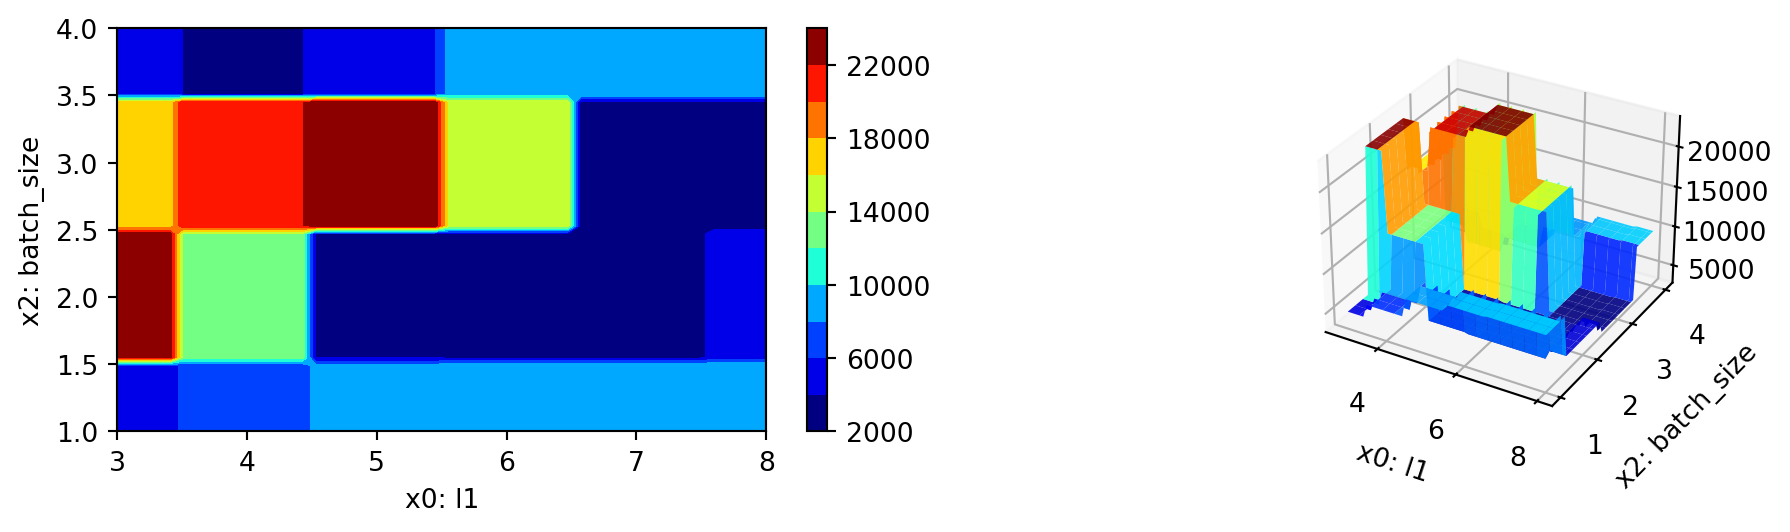

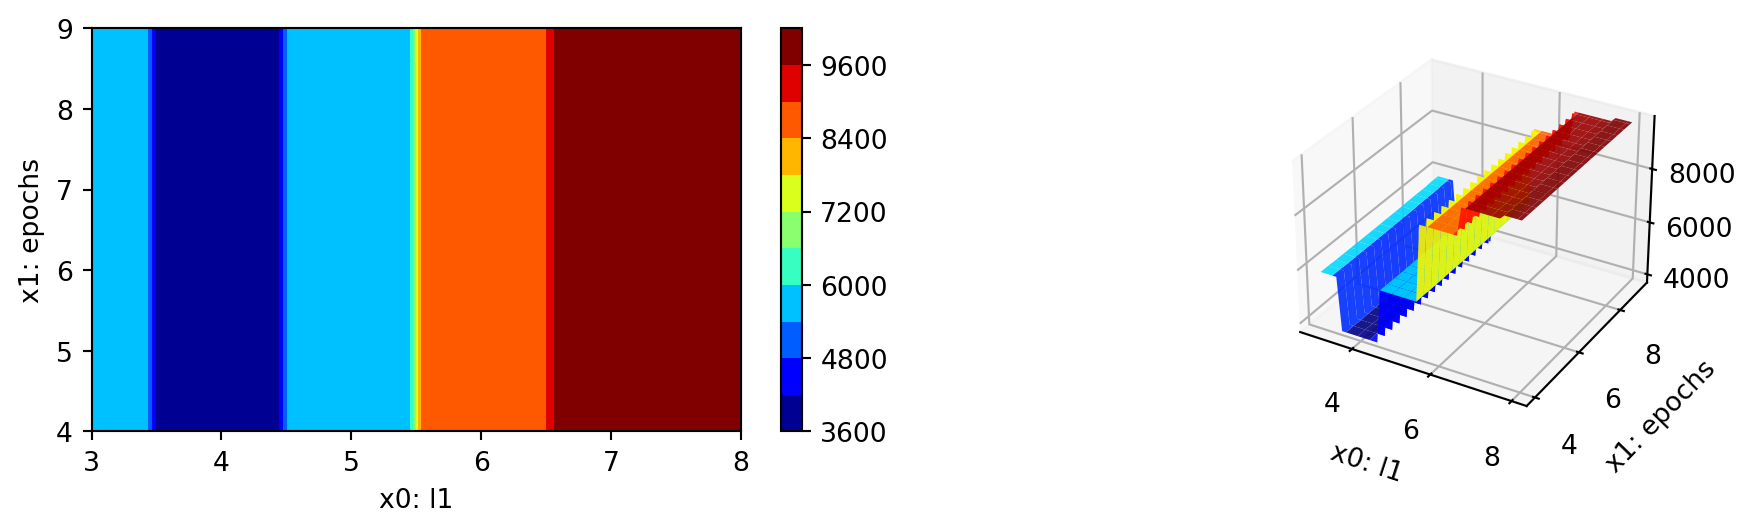

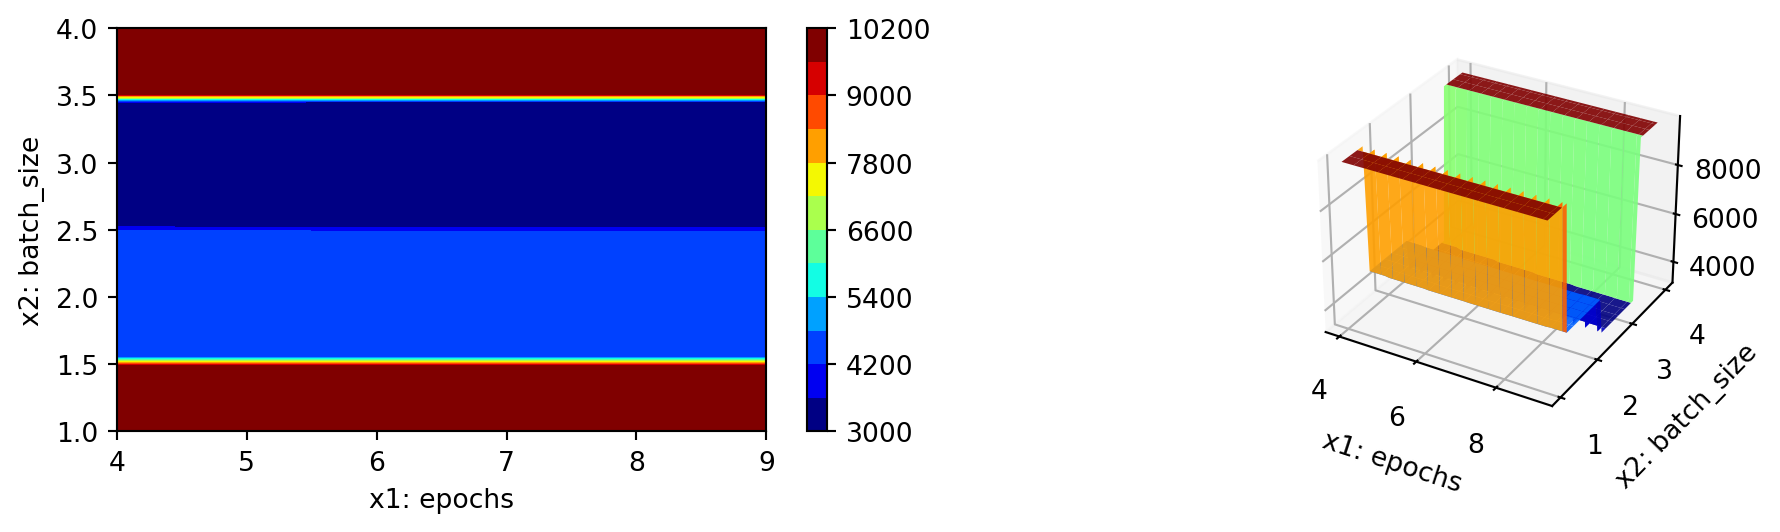

In [3]:
#| label: 601_run_print_plot_results
res = spot_tuner.run()
print(gen_design_table(fun_control=fun_control, spot=spot_tuner))
spot_tuner.plot_important_hyperparameter_contour(max_imp=3)

This basic setup can be adapted to user-specific needs in many ways. For example, the user can specify a custom data set, a custom model, or a custom loss function.
The user can also modify the hyperparameter settings. The following sections provide more details on how to customize the hyperparameter tuning process.



## General Experiment Setup{#sec-general-experiment-setup-601}

To keep track of the different experiments, we use a `PREFIX` for the experiment name. The `PREFIX` is used to create a unique experiment name. The `PREFIX` is also used to create a unique TensorBoard folder, which is used to store the TensorBoard log files.

`spotpython` allows the specification of two different types of stopping criteria: first, the number of function evaluations (`fun_evals`), and second, the maximum run time in seconds (`max_time`). Here, we will set the number of function evaluations to infinity and the maximum run time to one minute.

Furthermore, we set the initial design size (`init_size`) to 10. The initial design is used to train the surrogate model. The surrogate model is used to predict the performance of the hyperparameter configurations. The initial design is also used to train the first model. Since the `init_size` belongs to the experimental design, it is set in the `design_control` dictionary, see [[SOURCE]](https://sequential-parameter-optimization.github.io/spotpython/reference/spotpython/utils/init/#spotpython.utils.init.design_control_init).

`max_time` is set to one minute for demonstration purposes and `init_size` is set to 10 for demonstration purposes. For real experiments, these values should be increased.
Note,  the total run time may exceed the specified `max_time`, because the initial design is always evaluated, even if this takes longer than `max_time`.

The following parameters are used to specify the general experiment setup:


In [4]:
#| label: 601_sum_exp
#| eval: false
PREFIX = "601"
fun_evals = inf
max_time = 1
init_size = 10

### Data Preprocessing {#sec-preprocessing-601}

Preprocessing is handled by `Lightning` and `PyTorch`. It is described in the [LIGHTNINGDATAMODULE](https://lightning.ai/docs/pytorch/stable/data/datamodule.html) documentation. Here you can find information about the `transforms` methods.

###  Data Splitting

The data splitting is handled by `Lightning`.

### Loss Function {#sec-loss-function-601-a}

The loss function is specified in the configurable network class [[SOURCE]](https://github.com/sequential-parameter-optimization/spotpython/blob/main/src/spotpython/light/regression/nn_linear_regressor.py).
We will use the mean squared error (MSE) as the loss function. i.e., from `torchmetrics` the function ` mean_squared_error`, see [[SOURCE]](https://github.com/Lightning-AI/torchmetrics/blob/master/src/torchmetrics/functional/regression/mse.py).
The user can specify any of the loss functions from `torchmetrics` via the argument `_torchmetric` in the `fun_control` dictionary, see [[SOURCE]](https://sequential-parameter-optimization.github.io/spotpython/reference/spotpython/utils/init/#spotpython.utils.init.fun_control_init).

A detailed description of the loss functions (torchmetrics) is presented in @sec-torchmetrics-601.


### The Objective Function `fun` {#sec-the-objective-function-31}

The objective function `fun` from the class `HyperLight` [[SOURCE]](https://github.com/sequential-parameter-optimization/spotpython/blob/main/src/spotpython/fun/hyperlight.py) is selected next. It implements an interface from `PyTorch`'s training, validation, and testing methods to `spotpython`.


In [5]:
#| eval: false
from spotpython.fun.hyperlight import HyperLight
fun = HyperLight().fun

### Model Setup

By using `core_model_name = "light.regression.NNLinearRegressor"`, the `spotpython` model class `NetLightRegression` [[SOURCE]](https://sequential-parameter-optimization.github.io/spotpython/reference/spotpython/light/regression/netlightregression/) from the `light.regression` module is selected.
For a given `core_model_name`, the corresponding hyperparameters are automatically loaded from the associated dictionary, which is stored as a JSON file. The JSON file contains hyperparameter type information, names, and bounds. For `spotpython` models, the hyperparameters are stored in the `LightHyperDict`, see [[SOURCE]](https://github.com/sequential-parameter-optimization/spotpython/blob/main/src/spotpython/hyperdict/light_hyper_dict.json)
Alternatively, you can load a local hyper_dict.
The `hyperdict`  uses the default hyperparameter settings. These can be modified as described in @sec-modifying-hyperparameter-levels.

The following parameters are used for the model setup:


In [6]:
#| eval: false
#| label: 601_sum_model-setup
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
core_model_name = "light.regression.NNLinearRegressor"
hyperdict = LightHyperDict
_L_in=10
_L_out=1

### Surrogate Model Setup

The default surrogate model is the `Kriging` model, see [[SOURCE]](https://sequential-parameter-optimization.github.io/spotpython/reference/spotpython/build/kriging/). We specify `noise` as `True` to include noise in the model. An `anisotropic` kernel is used, which allows different length scales for each dimension, by setting `n_theta = 2`. Furthermore, the interval for the `Lambda` value is set to `[1e-3, 1e2]`.

These parameters are set in the `surrogate_control` dictionary and therefore passed  to the `surrogate_control_init` function [[SOURCE]](https://sequential-parameter-optimization.github.io/spotpython/reference/spotpython/utils/init/#spotpython.utils.init.surrogate_control_init).


In [7]:
#| eval: false
#| label: 601_surrogate_control_setup
noise = True
n_theta = 2
min_Lambda = 1e-3
max_Lambda = 10

### Summary: Setting up the Experiment {#sec-summary-setting-up-the-experiment-601}

At this stage, all required information is available to set up the dictionaries for the hyperparameter tuning.
The class `Spot` [[SOURCE]](https://github.com/sequential-parameter-optimization/spotpython/blob/main/src/spotpython/spot/spot.py) is the hyperparameter tuning workhorse. It is initialized with the following parameters, which were specified above.

* `fun`: the objective function
* `fun_control`: the dictionary with the control parameters for the objective function
* `design_control`: the dictionary with the control parameters for the experimental design
* `surrogate_control`: the dictionary with the control parameters for the surrogate model
* `optimizer_control`: the dictionary with the control parameters for the optimizer

`spotpython` allows maximum flexibility in the definition of the hyperparameter tuning setup. Alternative surrogate models, optimizers, and experimental designs can be used. Thus, interfaces for the `surrogate` model, experimental `design`, and `optimizer` are provided. The default surrogate model is the kriging model, the default optimizer is the differential evolution, and default experimental design is the Latin hypercube design.


### Checking the Experimental Design


In [8]:
from spotpython.utils.eda import gen_design_table
print(gen_design_table(fun_control))

| name           | type   | default   |   lower |   upper | transform             |
|----------------|--------|-----------|---------|---------|-----------------------|
| l1             | int    | 3         |     3   |    8    | transform_power_2_int |
| epochs         | int    | 4         |     4   |    9    | transform_power_2_int |
| batch_size     | int    | 4         |     1   |    4    | transform_power_2_int |
| act_fn         | factor | ReLU      |     0   |    5    | None                  |
| optimizer      | factor | SGD       |     0   |    5    | None                  |
| dropout_prob   | float  | 0.01      |     0   |    0.25 | None                  |
| lr_mult        | float  | 1.0       |     0.1 |   10    | None                  |
| patience       | int    | 2         |     2   |    6    | transform_power_2_int |
| initialization | factor | Default   |     0   |    0    | None                  |


In [9]:
#| eval: false
from spotpython.hyperparameters.values import set_hyperparameter
set_hyperparameter(fun_control, "initialization", ["Default"])
print(gen_design_table(fun_control))

## Tensorboard {#sec-tensorboard-601}

The textual output shown in the console (or code cell) can be visualized with Tensorboard.



```{raw}
tensorboard --logdir="runs/"
```


Further information can be found in the [PyTorch Lightning documentation](https://lightning.ai/docs/pytorch/stable/api/lightning.pytorch.loggers.tensorboard.html) for Tensorboard.

## Running the Hyperparameter Tuning Experiment


In [10]:
#| label: 601_spot_run
#| eval: false
from spotpython.spot import spot
spot_tuner = spot.Spot(
    fun=fun,
    fun_control=fun_control,
    surrogate_control=surrogate_control,
)
res = spot_tuner.run()

## Using the `spotgui`

The `spotgui` [[github]](https://github.com/sequential-parameter-optimization/spotGUI) provides a convenient way to interact with the hyperparameter tuning process.
To obtain the settings from @sec-summary-setting-up-the-experiment-601, the `spotgui` can be started as shown in @fig-spotgui.

![spotgui](./figures_static/024_gui.png){width=100% #fig-spotgui}


## Results

### Progress Plot


After the hyperparameter tuning run is finished, the progress of the hyperparameter tuning can be visualized with `spotpython`'s method `plot_progress`. The black points represent the performace values (score or metric) of  hyperparameter configurations from the initial design, whereas the red points represents the  hyperparameter configurations found by the surrogate model based optimization.


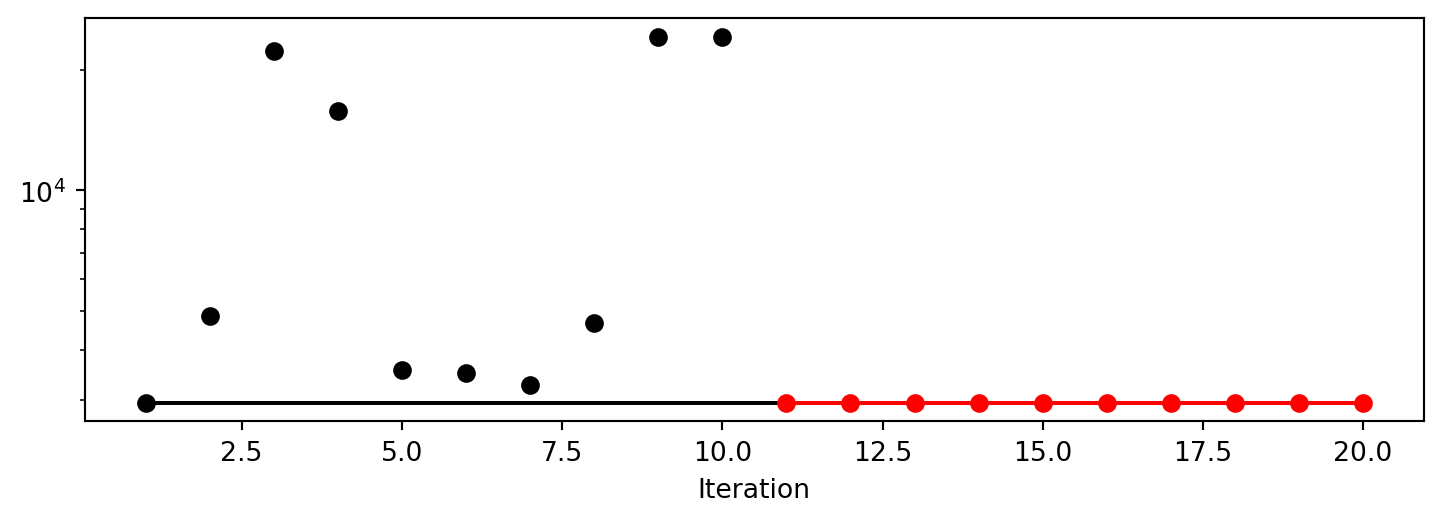

In [11]:
spot_tuner.plot_progress(log_y=True, filename=None)

### Tuned Hyperparameters and Their Importance

Results can be printed in tabular form.


In [12]:
from spotpython.utils.eda import gen_design_table
print(gen_design_table(fun_control=fun_control, spot=spot_tuner))

| name           | type   | default   |   lower |   upper | tuned               | transform             |   importance | stars   |
|----------------|--------|-----------|---------|---------|---------------------|-----------------------|--------------|---------|
| l1             | int    | 3         |     3.0 |     8.0 | 4.0                 | transform_power_2_int |         2.89 | *       |
| epochs         | int    | 4         |     4.0 |     9.0 | 6.0                 | transform_power_2_int |         0.01 |         |
| batch_size     | int    | 4         |     1.0 |     4.0 | 4.0                 | transform_power_2_int |       100.00 | ***     |
| act_fn         | factor | ReLU      |     0.0 |     5.0 | Swish               | None                  |         0.01 |         |
| optimizer      | factor | SGD       |     0.0 |     5.0 | Adamax              | None                  |         0.01 |         |
| dropout_prob   | float  | 0.01      |     0.0 |    0.25 | 0.20469763733360566 | N

A histogram can be used to visualize the most important hyperparameters.


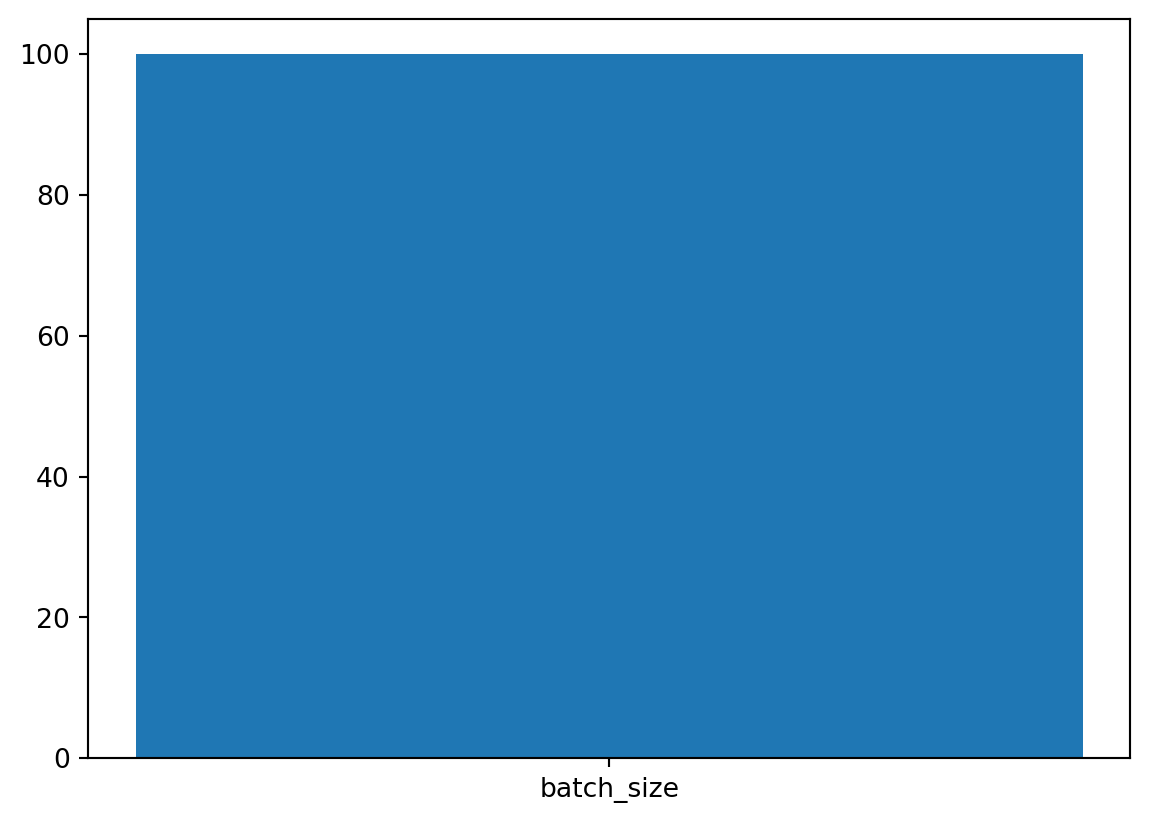

In [13]:
spot_tuner.plot_importance(threshold=10.0)

### Detailed Hyperparameter Plots


l1:  2.8865921627583586
epochs:  0.007105698344777786
batch_size:  100.0
act_fn:  0.007105698344777786
optimizer:  0.007105698344777786
dropout_prob:  0.007105698344777786
lr_mult:  0.007105698344777786
patience:  0.007105698344777786
impo: [['l1', 2.8865921627583586], ['epochs', 0.007105698344777786], ['batch_size', 100.0], ['act_fn', 0.007105698344777786], ['optimizer', 0.007105698344777786], ['dropout_prob', 0.007105698344777786], ['lr_mult', 0.007105698344777786], ['patience', 0.007105698344777786]]
indices: [2, 0, 1, 3, 4, 5, 6, 7]
indices after max_imp selection: [2, 0, 1]


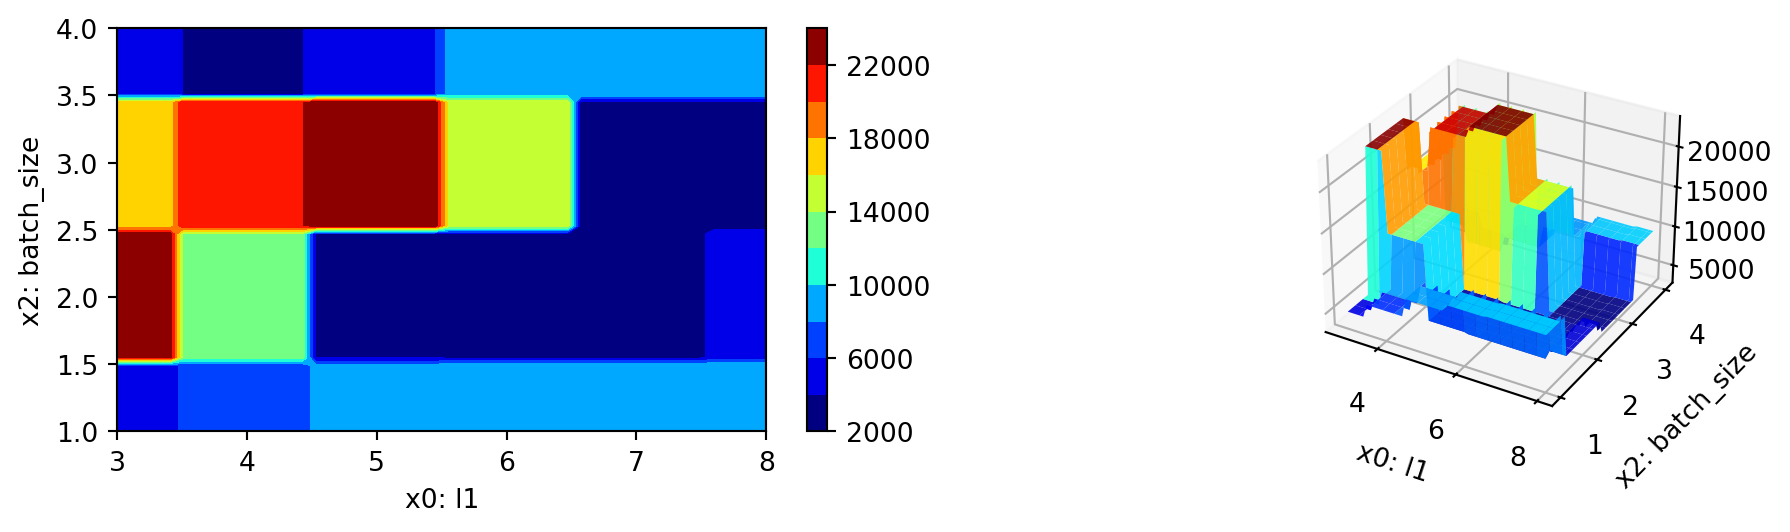

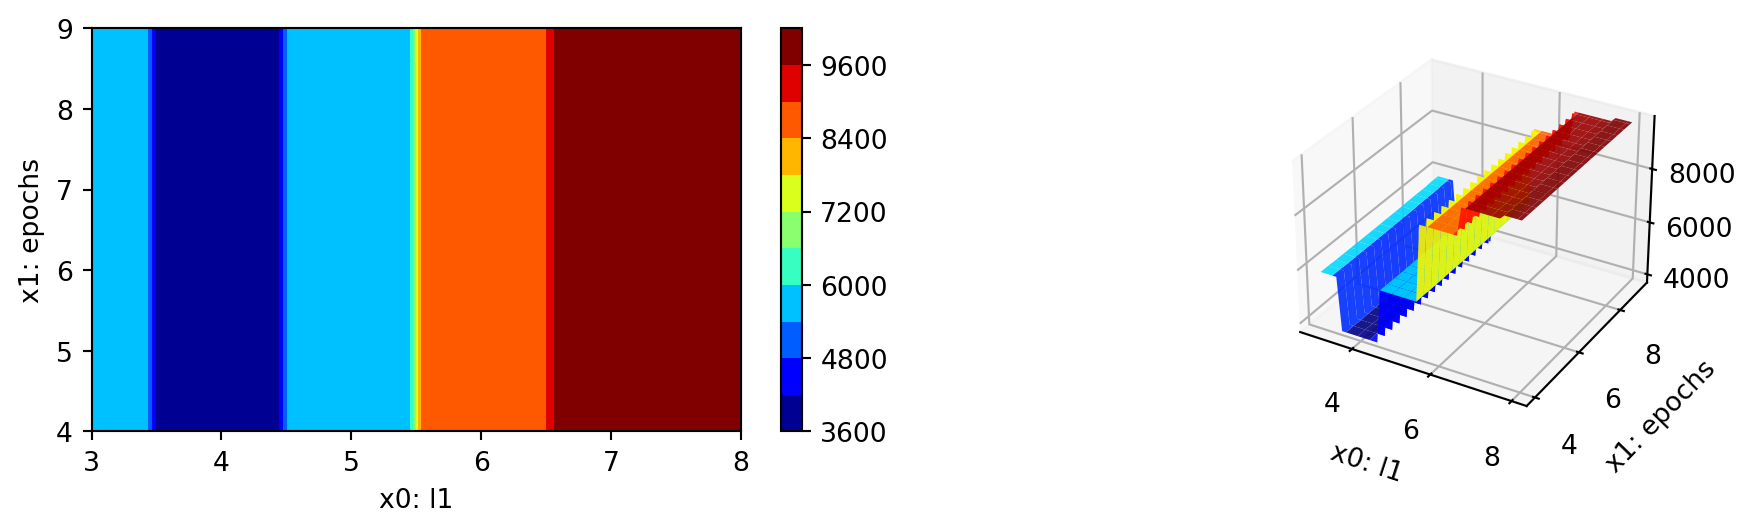

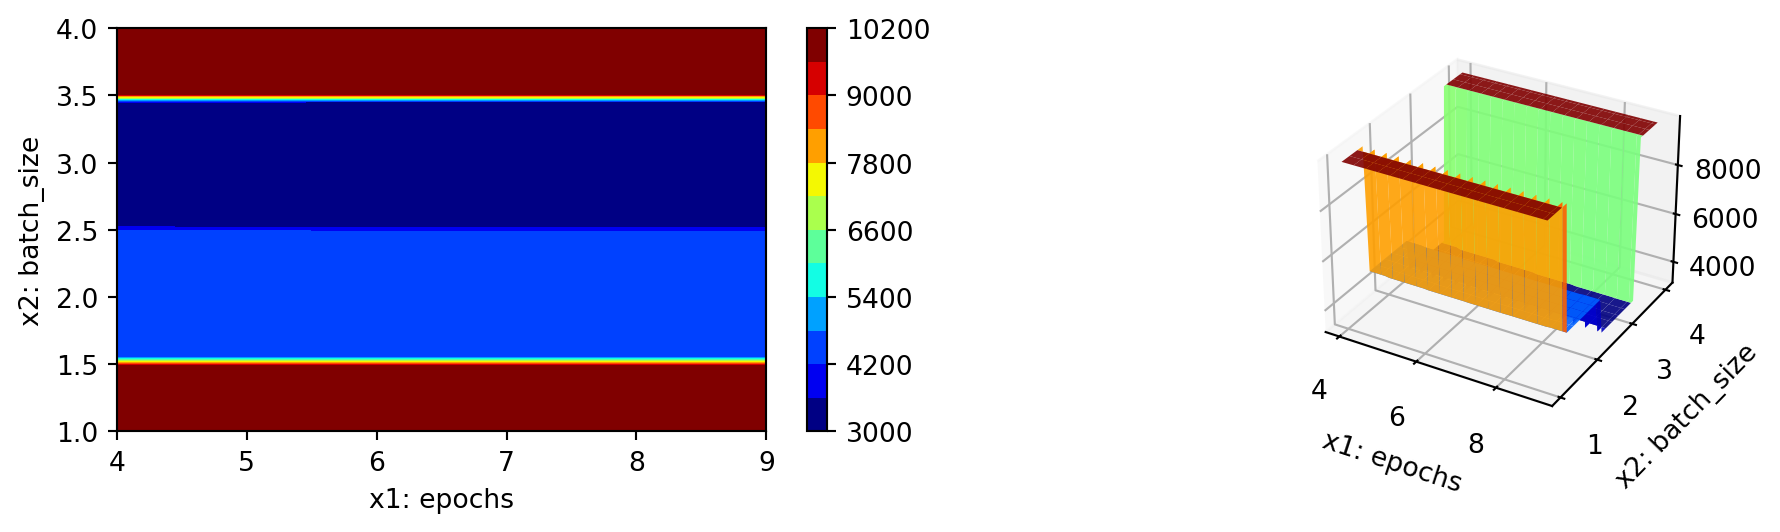

In [14]:
#| label: 601_plot_important_hyperparameter_contour
spot_tuner.plot_important_hyperparameter_contour(max_imp=3)

### Parallel Coordinates Plots


In [15]:
#| label: 601_parallel_plot
spot_tuner.parallel_plot()

## Load the saved experiment and get the hyperparameters (tuned architecture)


In [16]:
from spotpython.utils.file import get_experiment_from_PREFIX
config = get_experiment_from_PREFIX("601")["config"]
config

{'l1': 16,
 'epochs': 64,
 'batch_size': 16,
 'act_fn': Swish(),
 'optimizer': 'Adamax',
 'dropout_prob': 0.20469763733360566,
 'lr_mult': 9.085888451953213,
 'patience': 4,
 'initialization': 'Default'}

### Cross Validation With Lightning

* The `KFold` class from `sklearn.model_selection` is used to generate the folds for cross-validation.
* These mechanism is used to generate the folds for the final evaluation of the model.
* The `CrossValidationDataModule` class [[SOURCE]](https://github.com/sequential-parameter-optimization/spotpython/blob/main/src/spotpython/data/lightcrossvalidationdatamodule.py) is used to generate the folds for the hyperparameter tuning process.
* It is called from the `cv_model` function [[SOURCE]](https://github.com/sequential-parameter-optimization/spotpython/blob/main/src/spotpython/light/cvmodel.py).


In [17]:
from spotpython.light.cvmodel import cv_model
from spotpython.hyperparameters.values import set_control_key_value
set_control_key_value(control_dict=fun_control,
                        key="k_folds",
                        value=2,
                        replace=True)
set_control_key_value(control_dict=fun_control,
                        key="test_size",
                        value=0.6,
                        replace=True)
cv_model(config, fun_control)

GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 425    | train | [16, 10] | [16, 1]  
---------------------------------------------------------------------
425       Trainable params
0         Non-trainable params
425       Total params
0.002     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


k: 0
Train Dataset Size: 221
Val Dataset Size: 221


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         hp_metric         │     5415.60595703125      │
│         val_loss          │     5415.60595703125      │
└───────────────────────────┴───────────────────────────┘

GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 425    | train | [16, 10] | [16, 1]  
---------------------------------------------------------------------
425       Trainable params
0         Non-trainable params
425       Total params
0.002     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


train_model result: {'val_loss': 5415.60595703125, 'hp_metric': 5415.60595703125}
k: 1
Train Dataset Size: 221
Val Dataset Size: 221


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         hp_metric         │      4692.576171875       │
│         val_loss          │      4692.576171875       │
└───────────────────────────┴───────────────────────────┘

train_model result: {'val_loss': 4692.576171875, 'hp_metric': 4692.576171875}


5054.091064453125

## Test on the full data set


In [18]:
from spotpython.light.testmodel import test_model
test_model(config, fun_control)

GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 425    | train | [16, 10] | [16, 1]  
---------------------------------------------------------------------
425       Trainable params
0         Non-trainable params
425       Total params
0.002     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


LightDataModule.setup(): stage: TrainerFn.FITTING
train_size: 0.16, val_size: 0.24 used for train & val data.
LightDataModule.val_dataloader(). Val. set size: 106
LightDataModule.train_dataloader(). data_train size: 71


Restoring states from the checkpoint path at /Users/bartz/workspace/Hyperparameter-Tuning-Cookbook/runs/saved_models/16_64_16_Swish_Adamax_0.2047_9.0859_4_Default_TEST/last.ckpt


Loaded model weights from the checkpoint at /Users/bartz/workspace/Hyperparameter-Tuning-Cookbook/runs/saved_models/16_64_16_Swish_Adamax_0.2047_9.0859_4_Default_TEST/last.ckpt


LightDataModule.setup(): stage: TrainerFn.TESTING
test_size: 0.6 used for test dataset.
LightDataModule.test_dataloader(). Test set size: 266


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         hp_metric         │     5702.96240234375      │
│         val_loss          │     5702.96240234375      │
└───────────────────────────┴───────────────────────────┘

test_model result: {'val_loss': 5702.96240234375, 'hp_metric': 5702.96240234375}


(5702.96240234375, 5702.96240234375)

## Load the last model


In [19]:
from spotpython.light.loadmodel import load_light_from_checkpoint
model_loaded = load_light_from_checkpoint(config, fun_control)

config: {'l1': 16, 'epochs': 64, 'batch_size': 16, 'act_fn': Swish(), 'optimizer': 'Adamax', 'dropout_prob': 0.20469763733360566, 'lr_mult': 9.085888451953213, 'patience': 4, 'initialization': 'Default'}
Loading model with 16_64_16_Swish_Adamax_0.2047_9.0859_4_Default_TEST from runs/saved_models/16_64_16_Swish_Adamax_0.2047_9.0859_4_Default_TEST/last.ckpt
Model: NNLinearRegressor(
  (layers): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): Swish()
    (2): Dropout(p=0.20469763733360566, inplace=False)
    (3): Linear(in_features=16, out_features=8, bias=True)
    (4): Swish()
    (5): Dropout(p=0.20469763733360566, inplace=False)
    (6): Linear(in_features=8, out_features=8, bias=True)
    (7): Swish()
    (8): Dropout(p=0.20469763733360566, inplace=False)
    (9): Linear(in_features=8, out_features=4, bias=True)
    (10): Swish()
    (11): Dropout(p=0.20469763733360566, inplace=False)
    (12): Linear(in_features=4, out_features=1, bias=True)
  )
)


In [20]:
from spotpython.utils.init import get_feature_names
get_feature_names(fun_control)

['age',
 'sex',
 'bmi',
 'bp',
 's1_tc',
 's2_ldl',
 's3_hdl',
 's4_tch',
 's5_ltg',
 's6_glu']

### Integrated Gradients


GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 425    | train | [16, 10] | [16, 1]  
---------------------------------------------------------------------
425       Trainable params
0         Non-trainable params
425       Total params
0.002     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


LightDataModule.setup(): stage: TrainerFn.FITTING
train_size: 0.16, val_size: 0.24 used for train & val data.
LightDataModule.val_dataloader(). Val. set size: 106
LightDataModule.train_dataloader(). data_train size: 71


LightDataModule.setup(): stage: TrainerFn.VALIDATING
LightDataModule.val_dataloader(). Val. set size: 106


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         hp_metric         │      6307.9716796875      │
│         val_loss          │      6307.9716796875      │
└───────────────────────────┴───────────────────────────┘

train_model result: {'val_loss': 6307.9716796875, 'hp_metric': 6307.9716796875}
config: {'l1': 16, 'epochs': 64, 'batch_size': 16, 'act_fn': Swish(), 'optimizer': 'Adamax', 'dropout_prob': 0.20469763733360566, 'lr_mult': 9.085888451953213, 'patience': 4, 'initialization': 'Default'}
Loading model with 16_64_16_Swish_Adamax_0.2047_9.0859_4_Default_TRAIN from runs/saved_models/16_64_16_Swish_Adamax_0.2047_9.0859_4_Default_TRAIN/last.ckpt
Model: NNLinearRegressor(
  (layers): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): Swish()
    (2): Dropout(p=0.20469763733360566, inplace=False)
    (3): Linear(in_features=16, out_features=8, bias=True)
    (4): Swish()
    (5): Dropout(p=0.20469763733360566, inplace=False)
    (6): Linear(in_features=8, out_features=8, bias=True)
    (7): Swish()
    (8): Dropout(p=0.20469763733360566, inplace=False)
    (9): Linear(in_features=8, out_features=4, bias=True)
    (10): Swish()
    (11): Dropout(p=0.20469763733360566, 

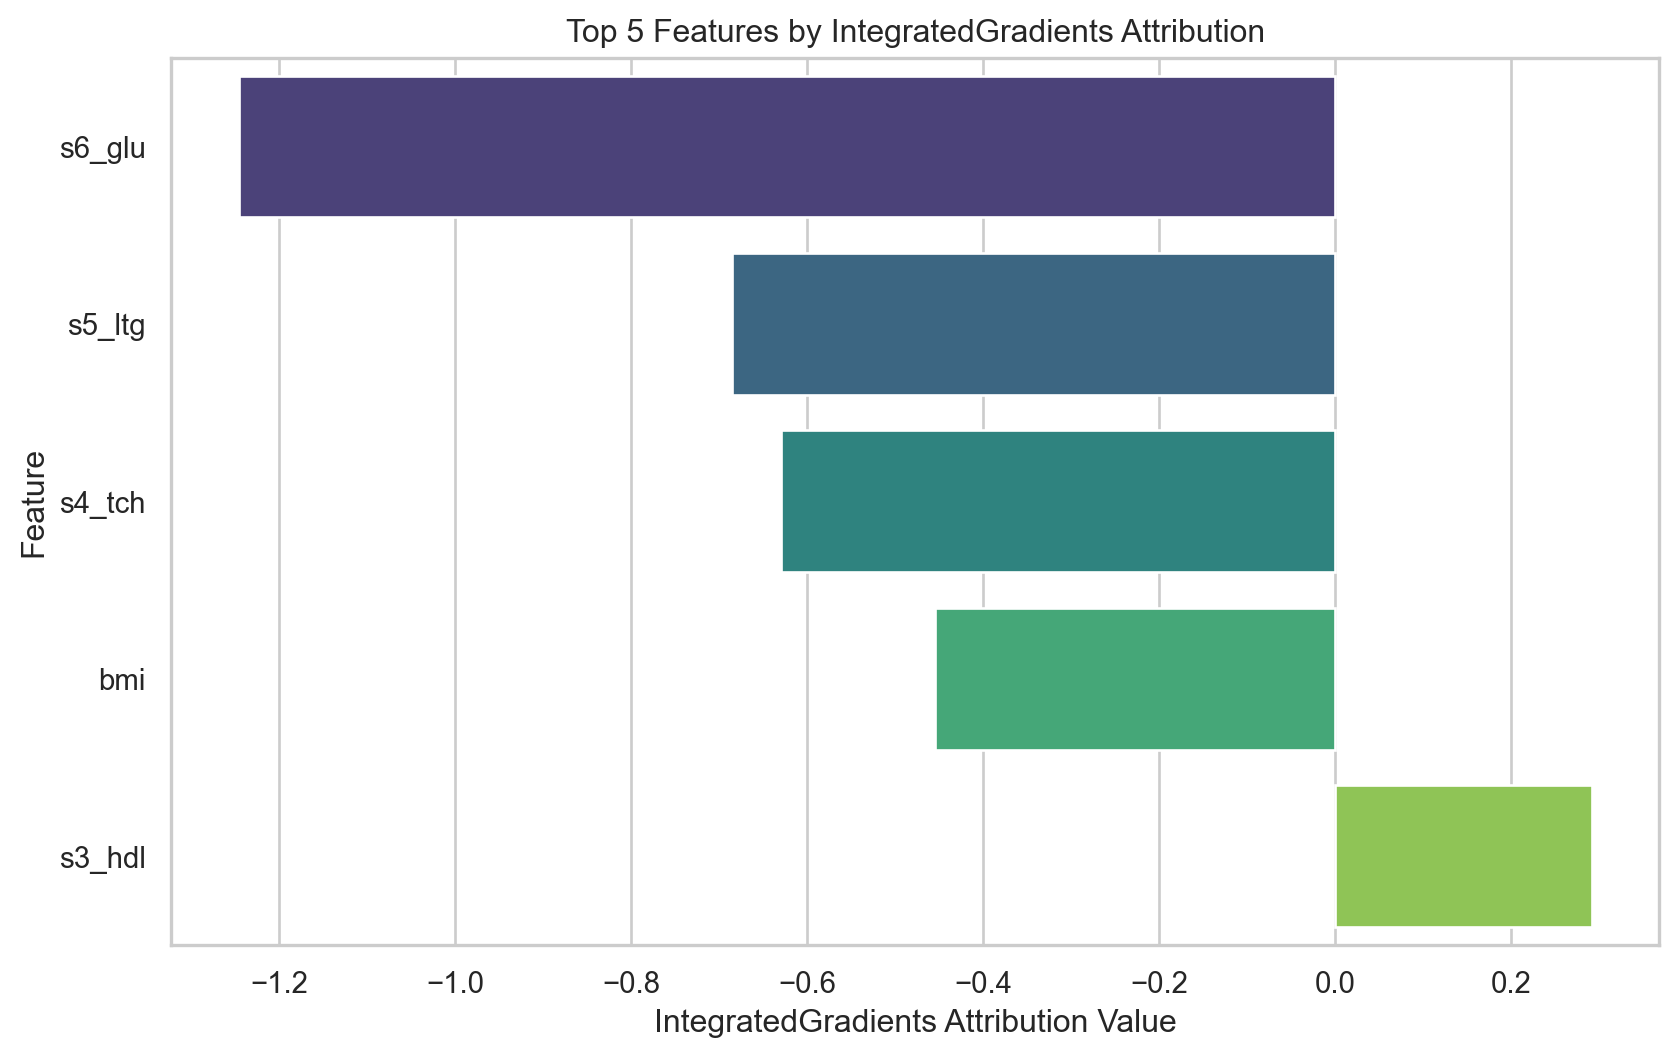

In [21]:
from spotpython.plot.xai import get_attributions, plot_attributions
df = get_attributions(spot_tuner, fun_control, attr_method="IntegratedGradients")
print(df)
plot_attributions(df)

### Deep Lift


GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 425    | train | [16, 10] | [16, 1]  
---------------------------------------------------------------------
425       Trainable params
0         Non-trainable params
425       Total params
0.002     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


LightDataModule.setup(): stage: TrainerFn.FITTING
train_size: 0.16, val_size: 0.24 used for train & val data.
LightDataModule.val_dataloader(). Val. set size: 106
LightDataModule.train_dataloader(). data_train size: 71


LightDataModule.setup(): stage: TrainerFn.VALIDATING
LightDataModule.val_dataloader(). Val. set size: 106


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         hp_metric         │     6311.51513671875      │
│         val_loss          │     6311.51513671875      │
└───────────────────────────┴───────────────────────────┘

train_model result: {'val_loss': 6311.51513671875, 'hp_metric': 6311.51513671875}
config: {'l1': 16, 'epochs': 64, 'batch_size': 16, 'act_fn': Swish(), 'optimizer': 'Adamax', 'dropout_prob': 0.20469763733360566, 'lr_mult': 9.085888451953213, 'patience': 4, 'initialization': 'Default'}
Loading model with 16_64_16_Swish_Adamax_0.2047_9.0859_4_Default_TRAIN from runs/saved_models/16_64_16_Swish_Adamax_0.2047_9.0859_4_Default_TRAIN/last.ckpt
Model: NNLinearRegressor(
  (layers): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): Swish()
    (2): Dropout(p=0.20469763733360566, inplace=False)
    (3): Linear(in_features=16, out_features=8, bias=True)
    (4): Swish()
    (5): Dropout(p=0.20469763733360566, inplace=False)
    (6): Linear(in_features=8, out_features=8, bias=True)
    (7): Swish()
    (8): Dropout(p=0.20469763733360566, inplace=False)
    (9): Linear(in_features=8, out_features=4, bias=True)
    (10): Swish()
    (11): Dropout(p=0.20469763733360566

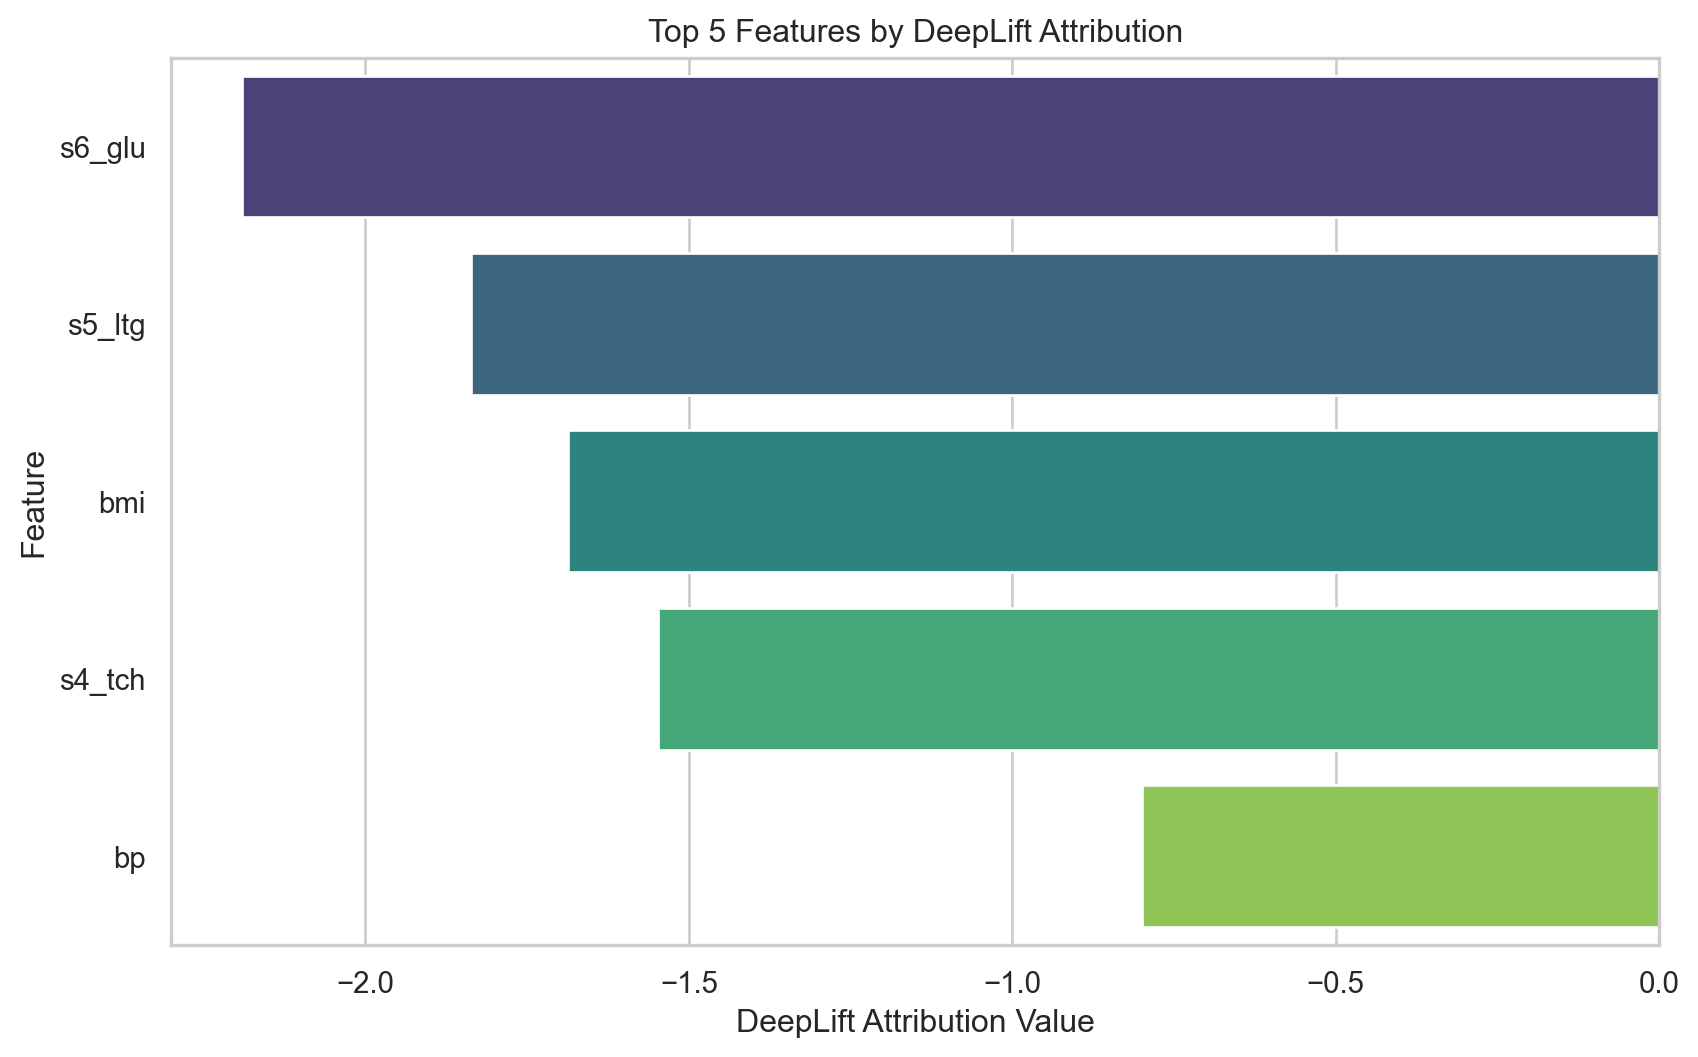

In [22]:
df = get_attributions(spot_tuner, fun_control, attr_method="DeepLift")
print(df)
plot_attributions(df,  attr_method="DeepLift")

### Feature Ablation


GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs


LightDataModule.setup(): stage: TrainerFn.FITTING
train_size: 0.16, val_size: 0.24 used for train & val data.



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 425    | train | [16, 10] | [16, 1]  
---------------------------------------------------------------------
425       Trainable params
0         Non-trainable params
425       Total params
0.002     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


LightDataModule.val_dataloader(). Val. set size: 106
LightDataModule.train_dataloader(). data_train size: 71


LightDataModule.setup(): stage: TrainerFn.VALIDATING
LightDataModule.val_dataloader(). Val. set size: 106


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         hp_metric         │     6767.90283203125      │
│         val_loss          │     6767.90283203125      │
└───────────────────────────┴───────────────────────────┘

train_model result: {'val_loss': 6767.90283203125, 'hp_metric': 6767.90283203125}
config: {'l1': 16, 'epochs': 64, 'batch_size': 16, 'act_fn': Swish(), 'optimizer': 'Adamax', 'dropout_prob': 0.20469763733360566, 'lr_mult': 9.085888451953213, 'patience': 4, 'initialization': 'Default'}
Loading model with 16_64_16_Swish_Adamax_0.2047_9.0859_4_Default_TRAIN from runs/saved_models/16_64_16_Swish_Adamax_0.2047_9.0859_4_Default_TRAIN/last.ckpt
Model: NNLinearRegressor(
  (layers): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): Swish()
    (2): Dropout(p=0.20469763733360566, inplace=False)
    (3): Linear(in_features=16, out_features=8, bias=True)
    (4): Swish()
    (5): Dropout(p=0.20469763733360566, inplace=False)
    (6): Linear(in_features=8, out_features=8, bias=True)
    (7): Swish()
    (8): Dropout(p=0.20469763733360566, inplace=False)
    (9): Linear(in_features=8, out_features=4, bias=True)
    (10): Swish()
    (11): Dropout(p=0.20469763733360566

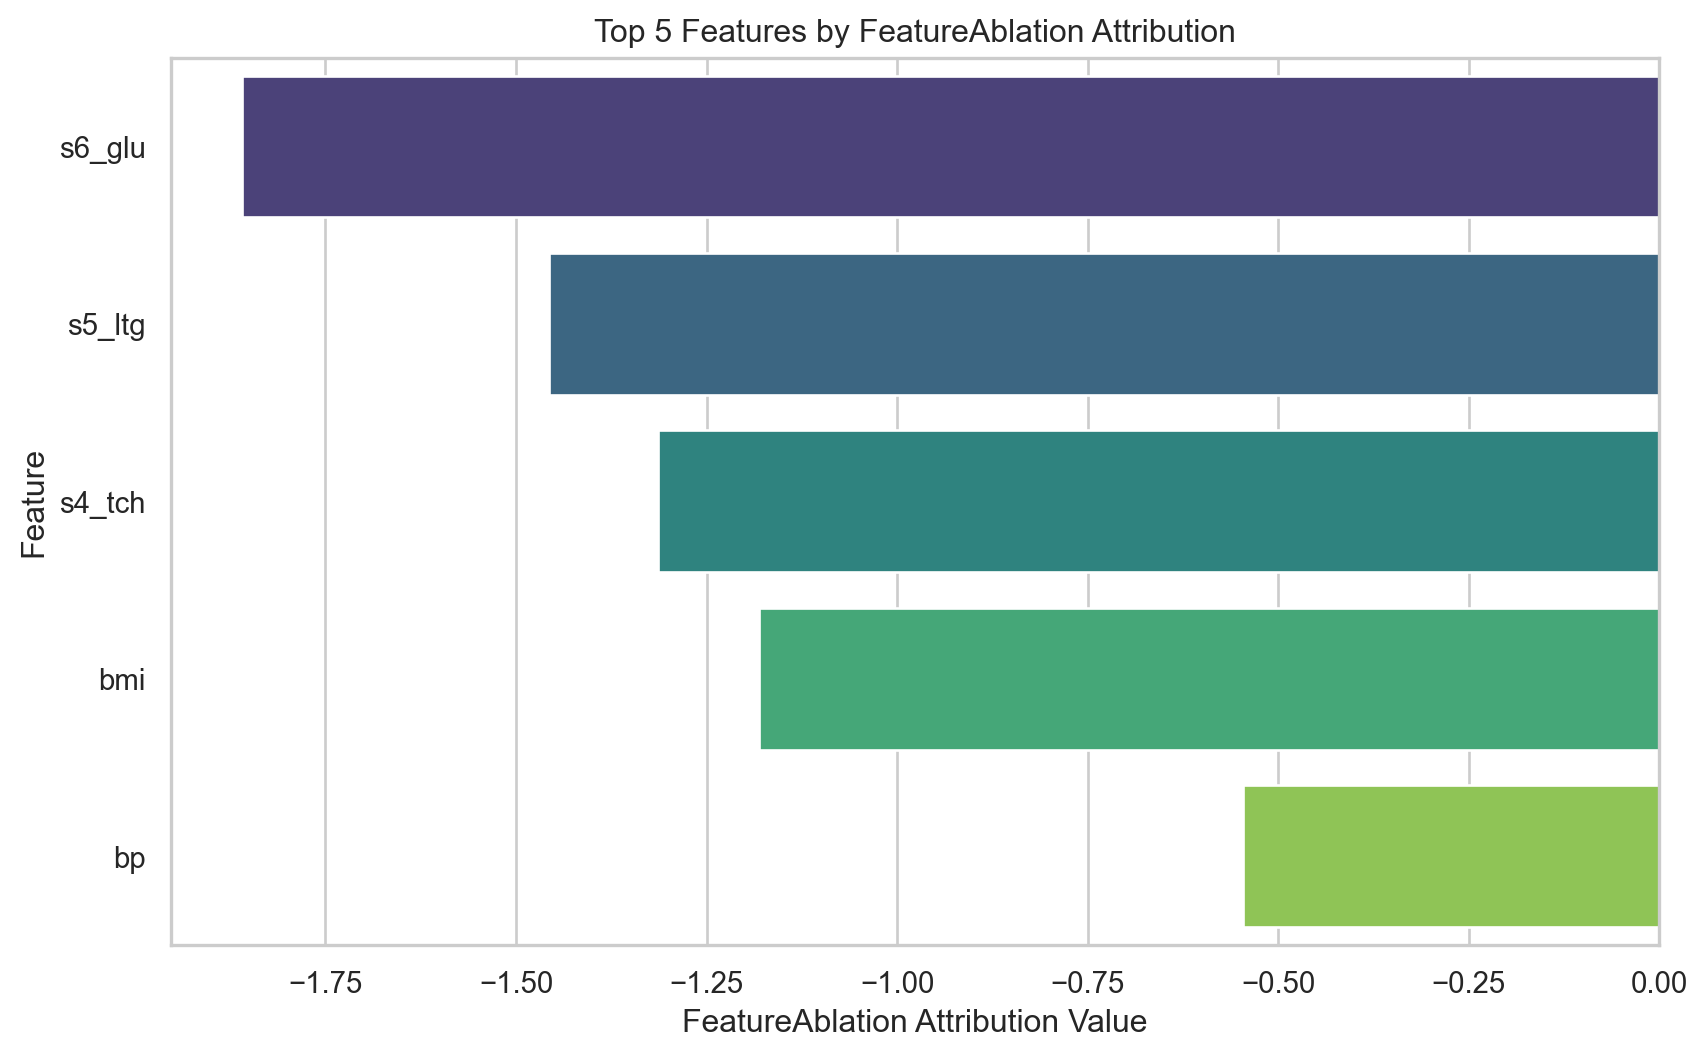

In [23]:
df = get_attributions(spot_tuner, fun_control, attr_method="FeatureAblation")
print(df)
plot_attributions(df, attr_method="FeatureAblation")

## Visualizing the Activations, Weights, and Gradients

In neural networks, activations, weights, and gradients are fundamental concepts that play different.

1. Activations:

   Activations refer to the outputs of neurons after applying an activation function. In neural networks, the input passes through each neuron of the network layers, where each unit calculates a weighted sum of its inputs and then applies a non-linear activation function (such as ReLU, Sigmoid, or Tanh). These activation functions help introduce non-linearity into the model, enabling the neural network to learn complex relationships between the input data and the predictions. In short, activations are the outputs that are forwarded by the neurons after applying the activation function.

2. Weights:

   Weights are parameters within a neural network that control the strength of the connection between two neurons in successive layers. They are adjusted during the training process to enable the neural network to perform the desired task as well as possible. Each input is multiplied by a weight, and the neural network learns by adjusting these weights based on the error between the predictions and the actual values. Adjusting the weights allows the network to recognize patterns and relationships in the input data and use them for predictions or classifications.

3. Gradients:

   In the context of machine learning and specifically in neural networks, gradients are a measure of the rate of change or the slope of the loss function (a function that measures how well the network performs in predicting the desired output) with respect to the weights. During the training process, the goal is to minimize the value of the loss function to improve the model’s performance. The gradients indicate the direction and size of the steps that need to be taken to adjust the weights in a way that minimizes the loss (known as gradient descent). By repeatedly adjusting the weights in the opposite direction of the gradient, the network can be effectively trained to improve its prediction accuracy.

::: {.callout-note}
### Reference:

* The following code is based on [[PyTorch Lightning TUTORIAL 2: ACTIVATION FUNCTIONS]](https://lightning.ai/docs/pytorch/stable/notebooks/course_UvA-DL/02-activation-functions.html), Author: Phillip Lippe, License: [[CC BY-SA]](https://creativecommons.org/licenses/by-sa/3.0/), Generated: 2023-03-15T09:52:39.179933.

:::

After we have trained the models, we can look at the actual activation values that find inside the model. For instance, how many neurons are set to zero in ReLU? Where do we find most values in Tanh? To answer these questions, we can write a simple function which takes a trained model, applies it to a batch of images, and plots the histogram of the activations inside the network:


In [24]:
from spotpython.plot.xai import (get_activations, get_gradients, get_weights, plot_nn_values_hist, plot_nn_values_scatter, visualize_weights, visualize_gradients, visualize_activations, visualize_activations_distributions, visualize_gradient_distributions, visualize_weights_distributions)
import pprint

In [25]:
from spotpython.utils.file import get_experiment_from_PREFIX
get_experiment_from_PREFIX("601", return_dict=False)
pprint.pprint(config)
batch_size = config["batch_size"]
print(batch_size)

{'act_fn': Swish(),
 'batch_size': 16,
 'dropout_prob': 0.20469763733360566,
 'epochs': 64,
 'initialization': 'Default',
 'l1': 16,
 'lr_mult': 9.085888451953213,
 'optimizer': 'Adamax',
 'patience': 4}
16


In [26]:
from spotpython.light.loadmodel import load_light_from_checkpoint
model_loaded = load_light_from_checkpoint(config, fun_control)
model = model_loaded.to("cpu")

config: {'l1': 16, 'epochs': 64, 'batch_size': 16, 'act_fn': Swish(), 'optimizer': 'Adamax', 'dropout_prob': 0.20469763733360566, 'lr_mult': 9.085888451953213, 'patience': 4, 'initialization': 'Default'}
Loading model with 16_64_16_Swish_Adamax_0.2047_9.0859_4_Default_TEST from runs/saved_models/16_64_16_Swish_Adamax_0.2047_9.0859_4_Default_TEST/last.ckpt


Model: NNLinearRegressor(
  (layers): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): Swish()
    (2): Dropout(p=0.20469763733360566, inplace=False)
    (3): Linear(in_features=16, out_features=8, bias=True)
    (4): Swish()
    (5): Dropout(p=0.20469763733360566, inplace=False)
    (6): Linear(in_features=8, out_features=8, bias=True)
    (7): Swish()
    (8): Dropout(p=0.20469763733360566, inplace=False)
    (9): Linear(in_features=8, out_features=4, bias=True)
    (10): Swish()
    (11): Dropout(p=0.20469763733360566, inplace=False)
    (12): Linear(in_features=4, out_features=1, bias=True)
  )
)


### Weights


In [27]:
weights, index = get_weights(model, return_index=True)
print(index)

[0, 3, 6, 9, 12]


160 values in Layer Layer 0.
9 padding values added.
169 values now in Layer Layer 0.


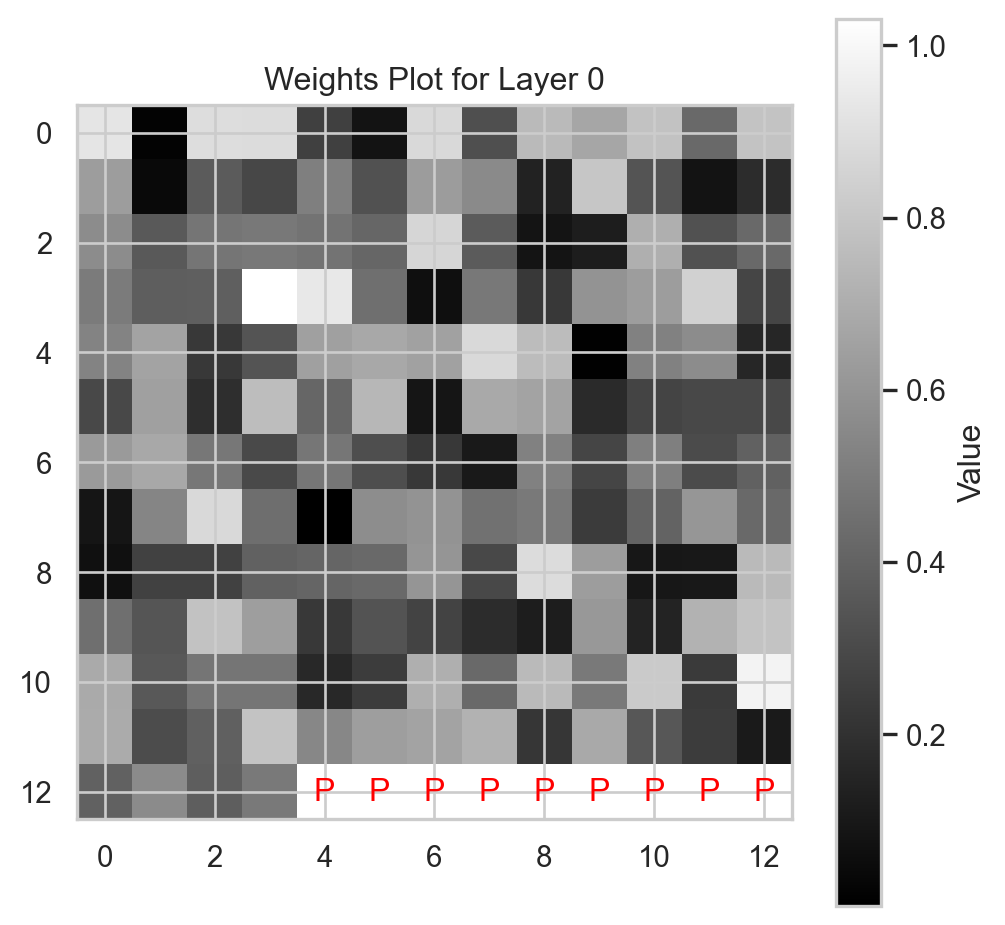

128 values in Layer Layer 3.
16 padding values added.
144 values now in Layer Layer 3.


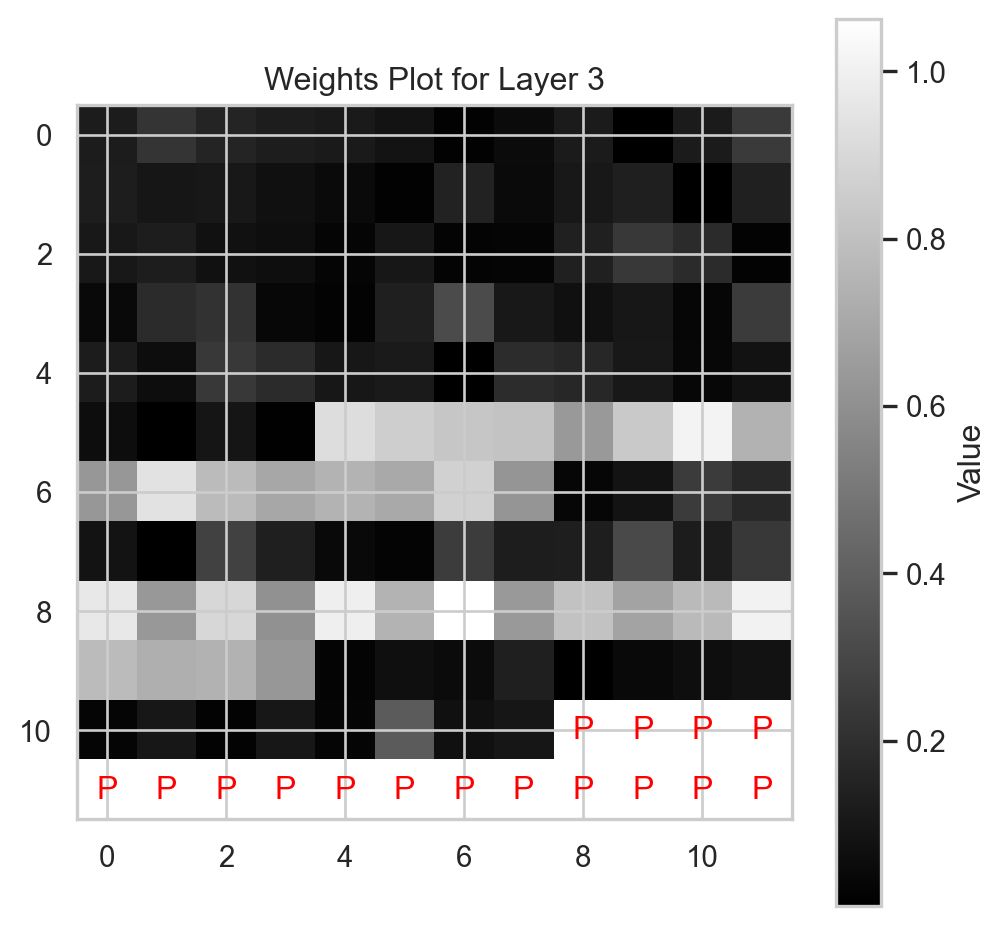

64 values in Layer Layer 6.
64 values now in Layer Layer 6.


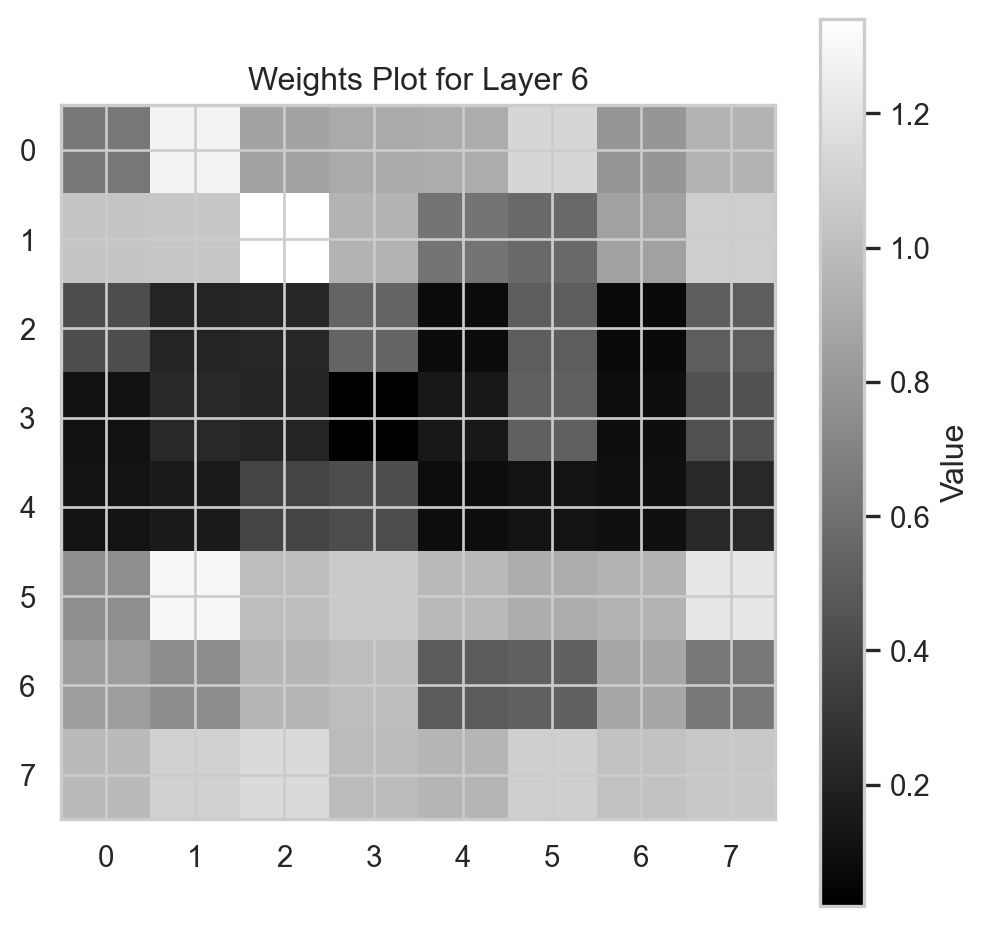

32 values in Layer Layer 9.
4 padding values added.
36 values now in Layer Layer 9.


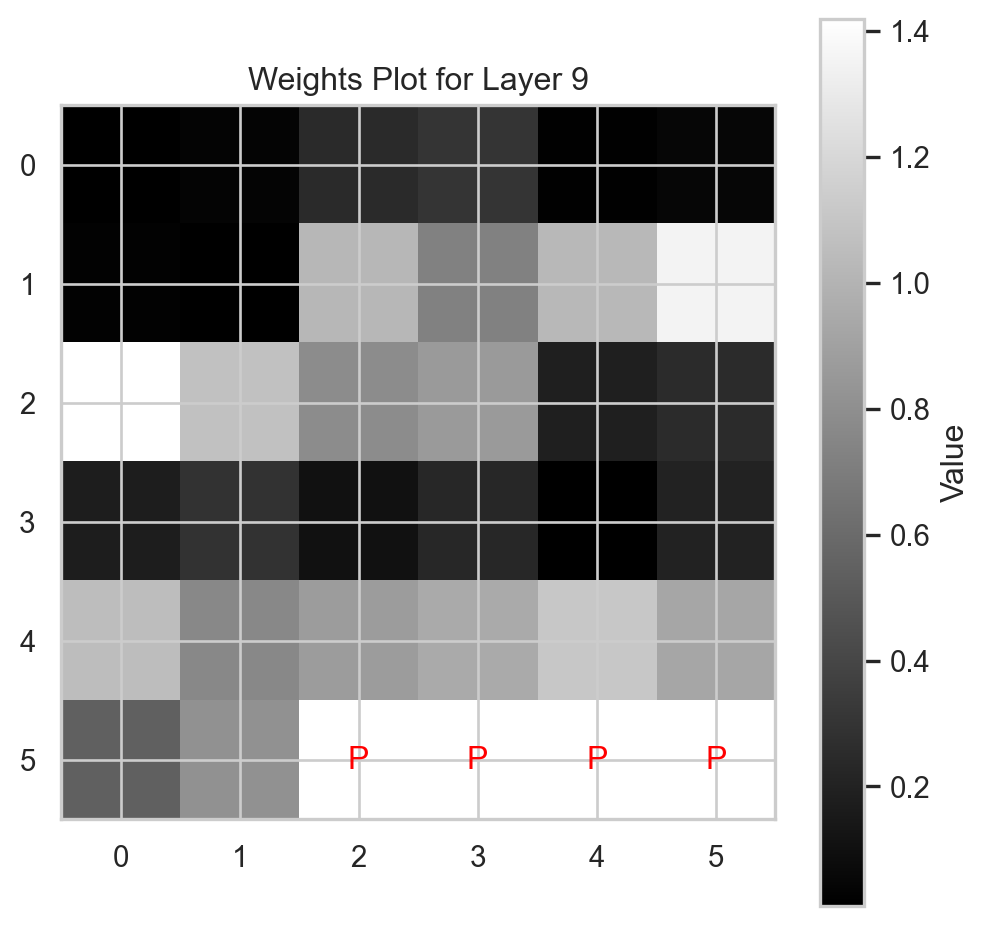

4 values in Layer Layer 12.
4 values now in Layer Layer 12.


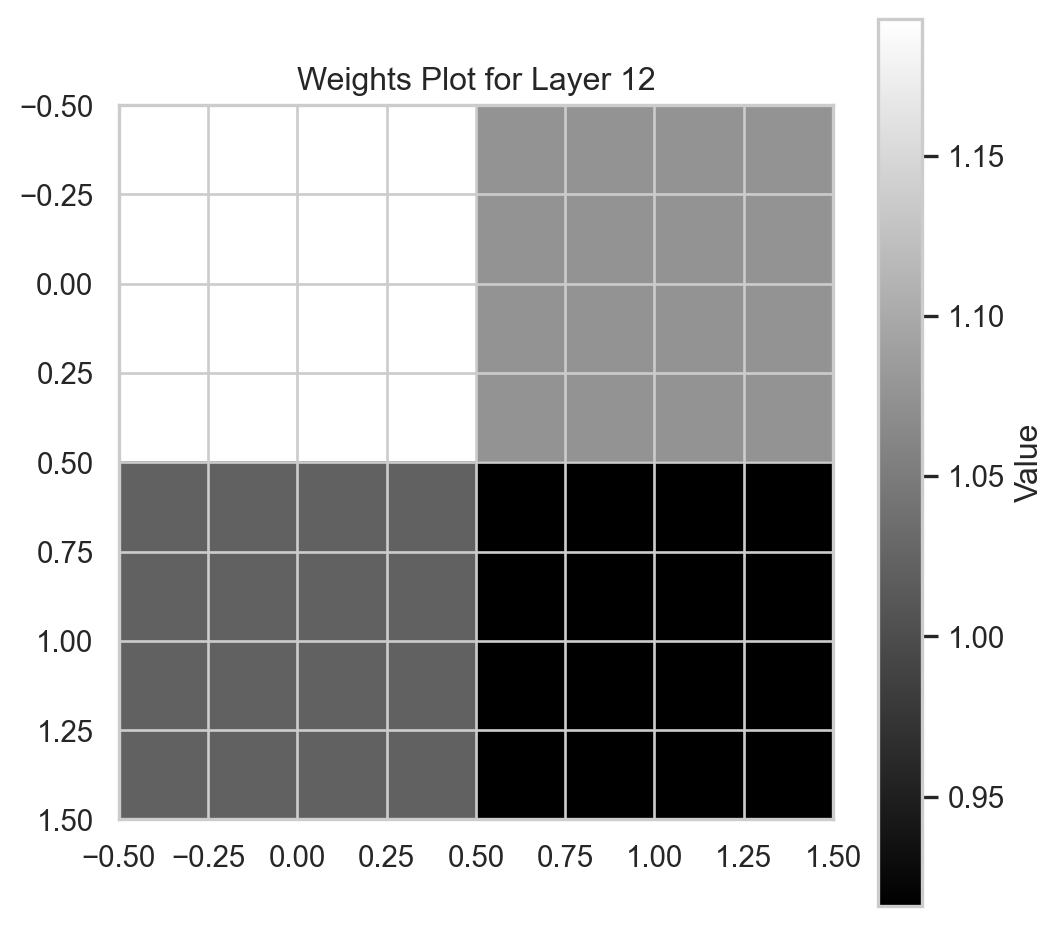

In [28]:
visualize_weights(model, absolute=True, cmap="gray", figsize=(6, 6))

n:5


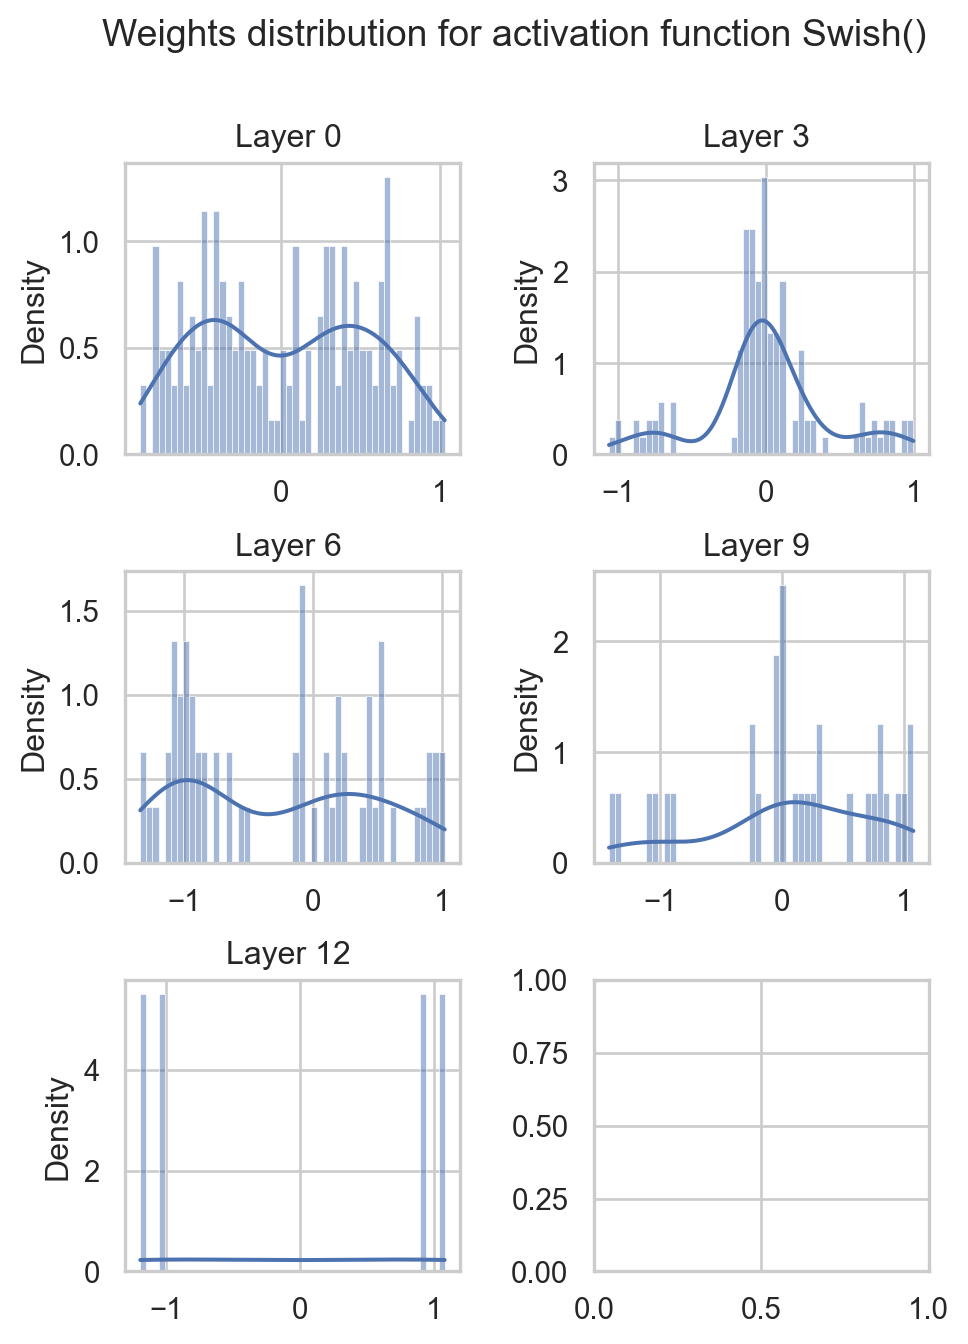

In [29]:
visualize_weights_distributions(model, color=f"C{0}")

### Activations


In [30]:
activations = get_activations(model, fun_control=fun_control, batch_size=batch_size, device = "cpu")

net: NNLinearRegressor(
  (layers): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): Swish()
    (2): Dropout(p=0.20469763733360566, inplace=False)
    (3): Linear(in_features=16, out_features=8, bias=True)
    (4): Swish()
    (5): Dropout(p=0.20469763733360566, inplace=False)
    (6): Linear(in_features=8, out_features=8, bias=True)
    (7): Swish()
    (8): Dropout(p=0.20469763733360566, inplace=False)
    (9): Linear(in_features=8, out_features=4, bias=True)
    (10): Swish()
    (11): Dropout(p=0.20469763733360566, inplace=False)
    (12): Linear(in_features=4, out_features=1, bias=True)
  )
)


net: NNLinearRegressor(
  (layers): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): Swish()
    (2): Dropout(p=0.20469763733360566, inplace=False)
    (3): Linear(in_features=16, out_features=8, bias=True)
    (4): Swish()
    (5): Dropout(p=0.20469763733360566, inplace=False)
    (6): Linear(in_features=8, out_features=8, bias=True)
    (7): Swish()
    (8): Dropout(p=0.20469763733360566, inplace=False)
    (9): Linear(in_features=8, out_features=4, bias=True)
    (10): Swish()
    (11): Dropout(p=0.20469763733360566, inplace=False)
    (12): Linear(in_features=4, out_features=1, bias=True)
  )
)
256 values in Layer 0.
256 values now in Layer 0.


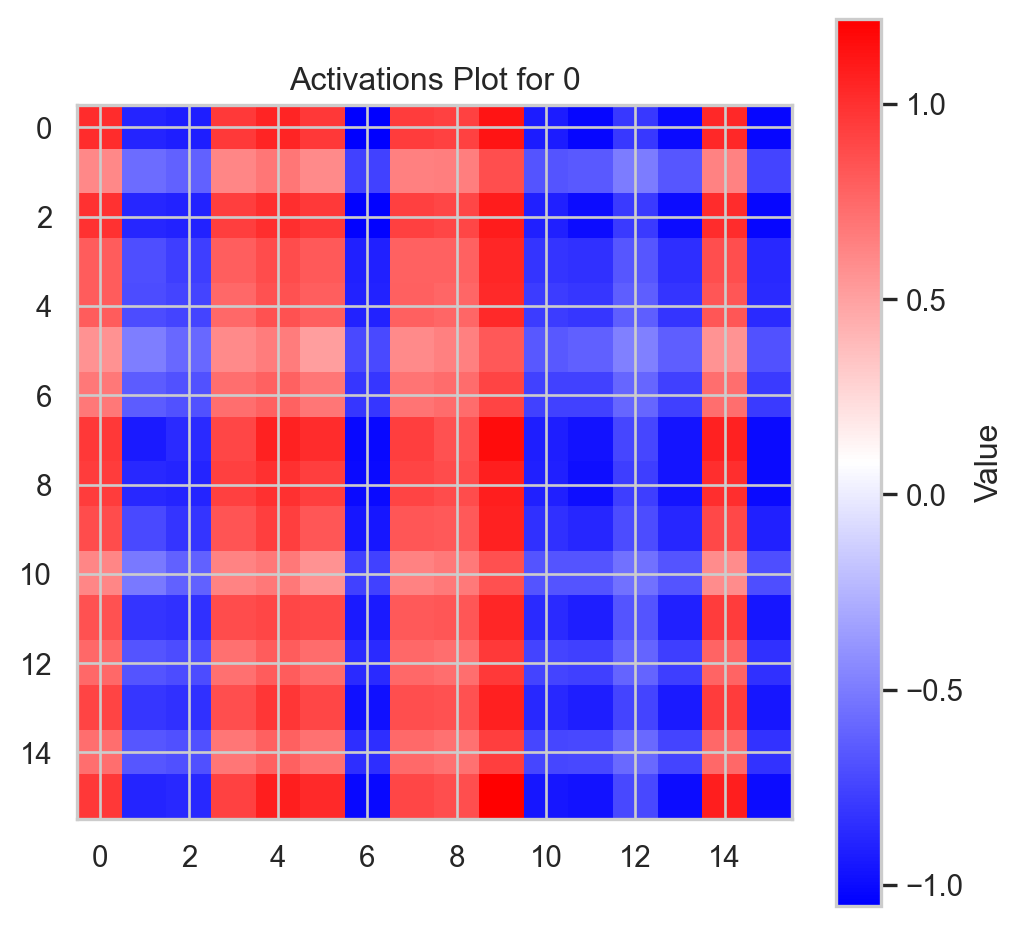

128 values in Layer 3.
16 padding values added.
144 values now in Layer 3.


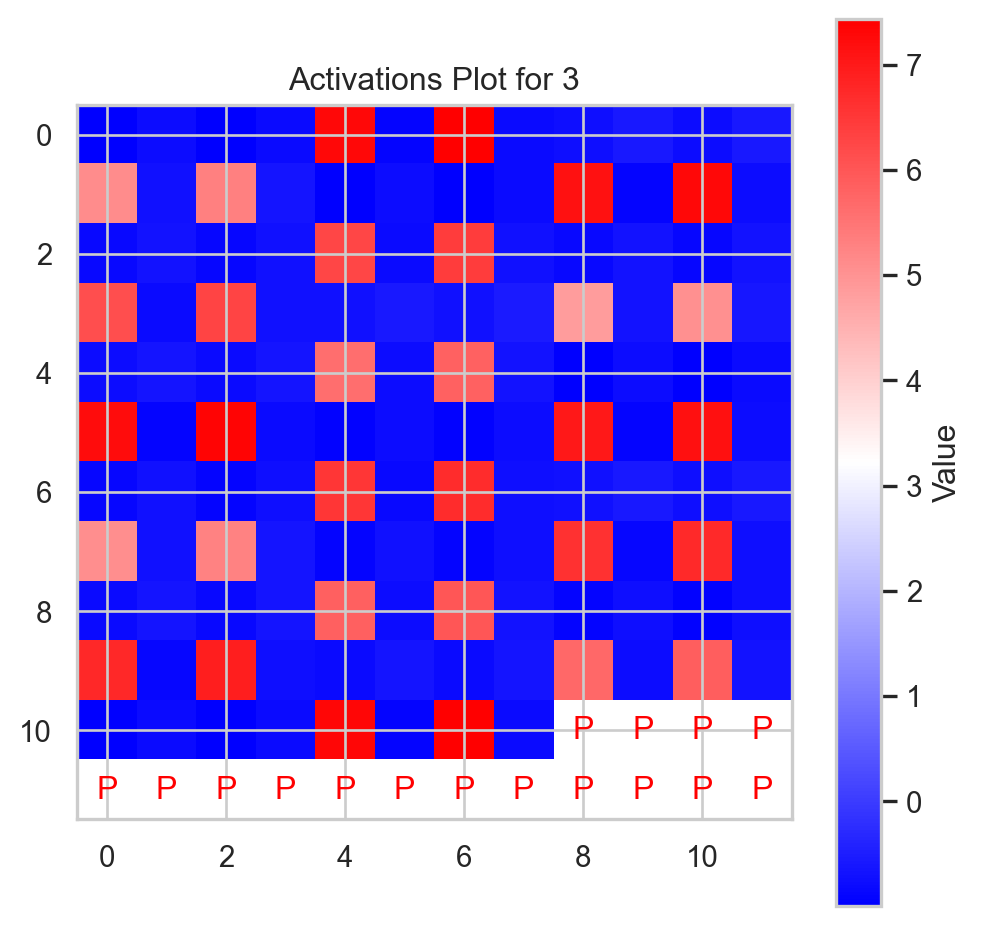

128 values in Layer 6.
16 padding values added.
144 values now in Layer 6.


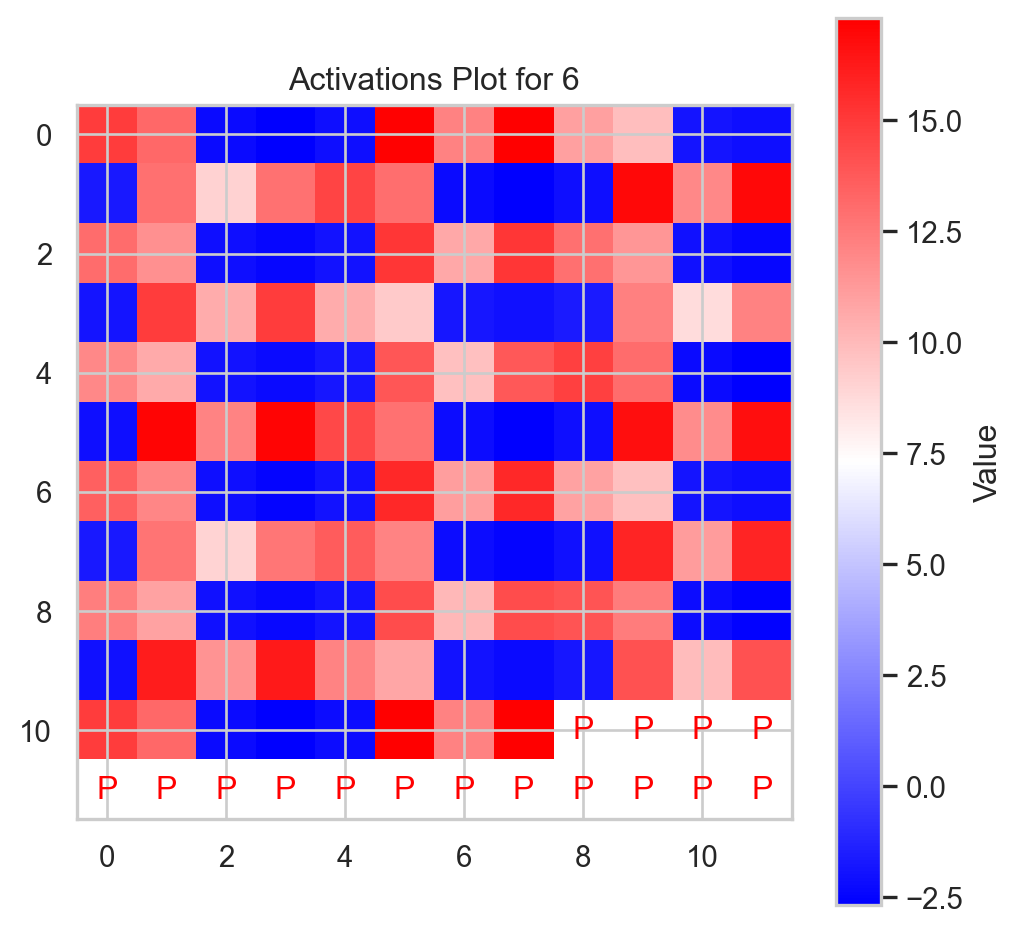

64 values in Layer 9.
64 values now in Layer 9.


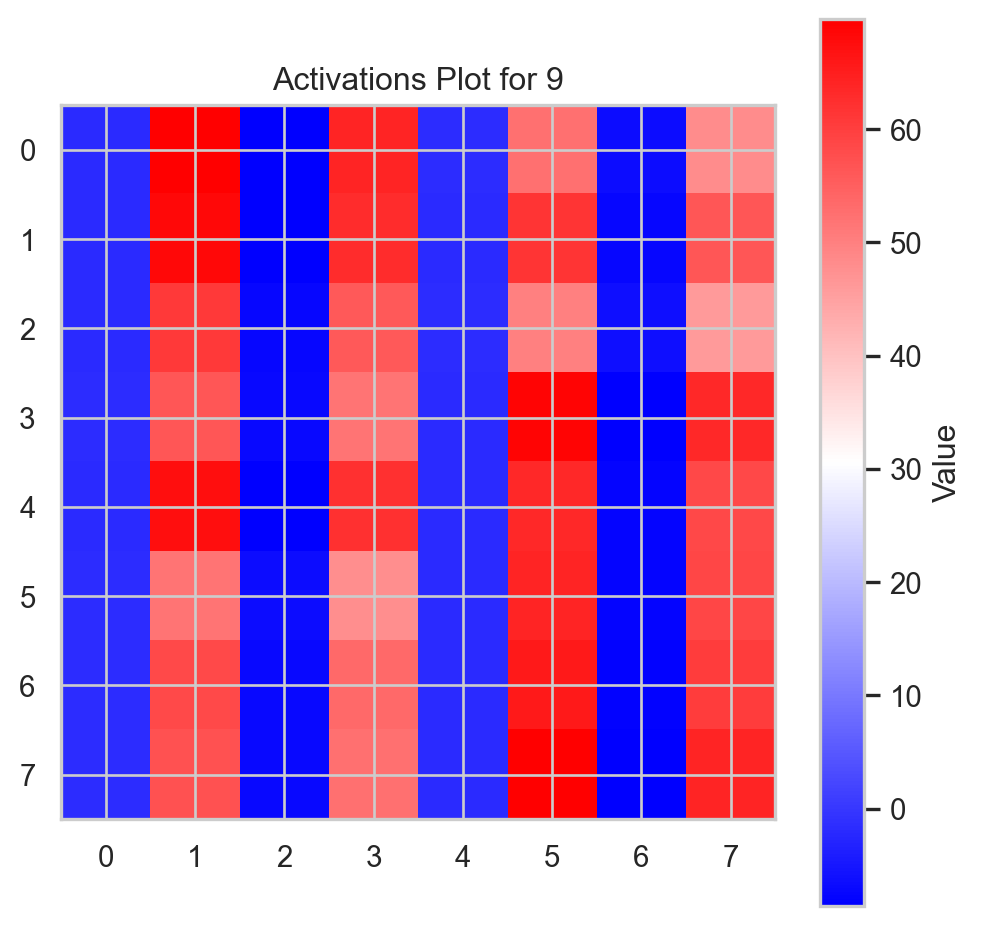

16 values in Layer 12.
16 values now in Layer 12.


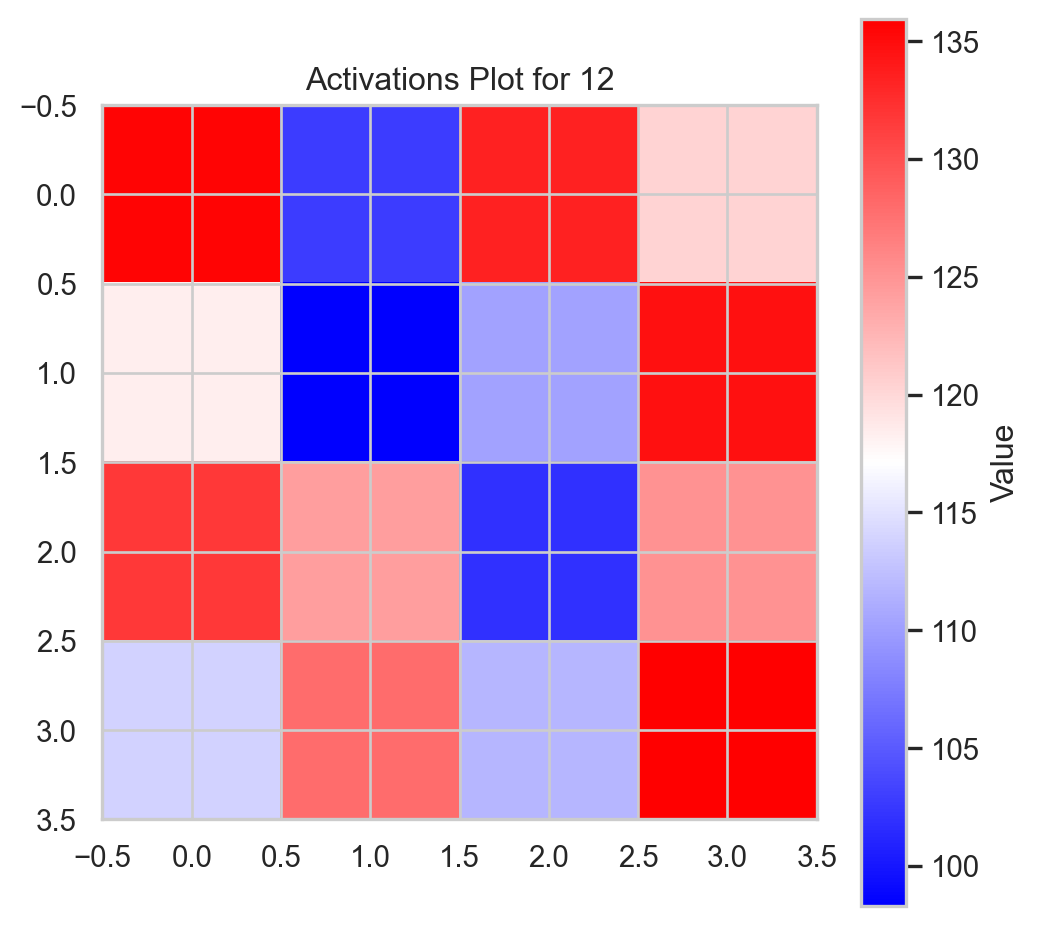

In [31]:
visualize_activations(model, fun_control=fun_control, batch_size=batch_size, device = "cpu", cmap="BlueWhiteRed", absolute=False)

* Absolute values of the activations are plotted:


net: NNLinearRegressor(
  (layers): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): Swish()
    (2): Dropout(p=0.20469763733360566, inplace=False)
    (3): Linear(in_features=16, out_features=8, bias=True)
    (4): Swish()
    (5): Dropout(p=0.20469763733360566, inplace=False)
    (6): Linear(in_features=8, out_features=8, bias=True)
    (7): Swish()
    (8): Dropout(p=0.20469763733360566, inplace=False)
    (9): Linear(in_features=8, out_features=4, bias=True)
    (10): Swish()
    (11): Dropout(p=0.20469763733360566, inplace=False)
    (12): Linear(in_features=4, out_features=1, bias=True)
  )
)
256 values in Layer 0.
256 values now in Layer 0.


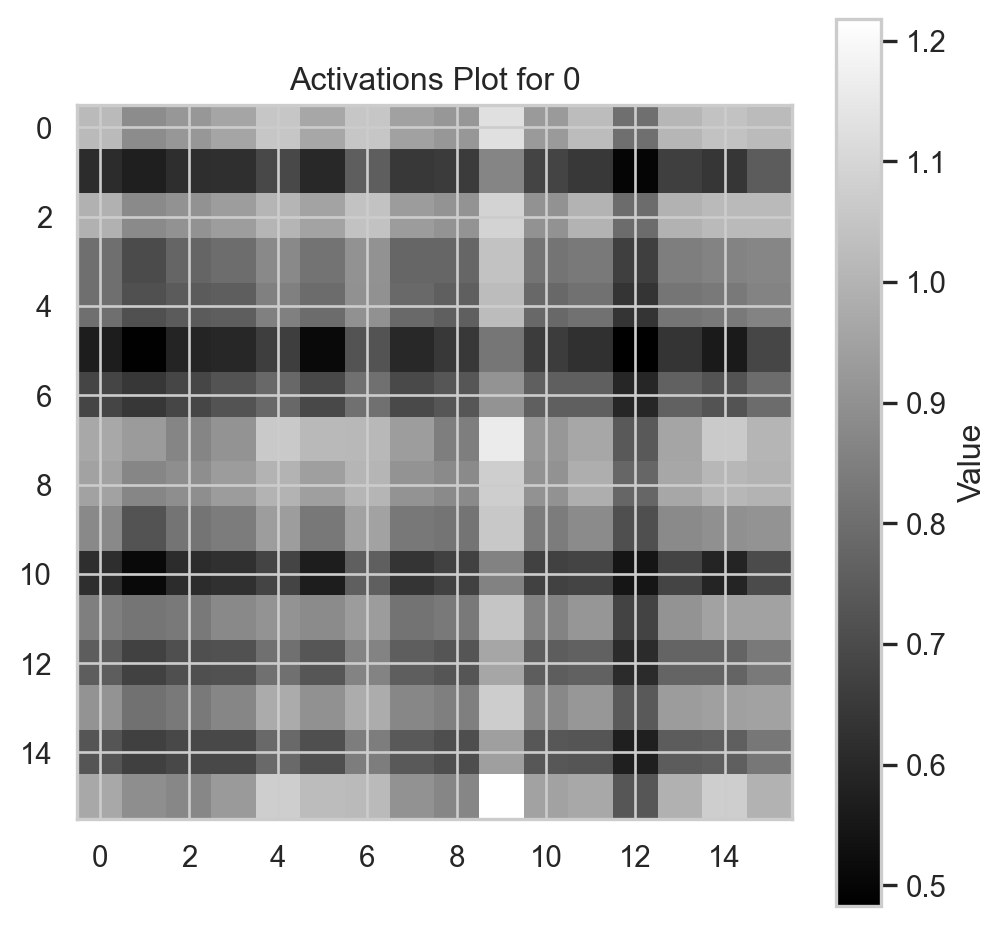

128 values in Layer 3.
16 padding values added.
144 values now in Layer 3.


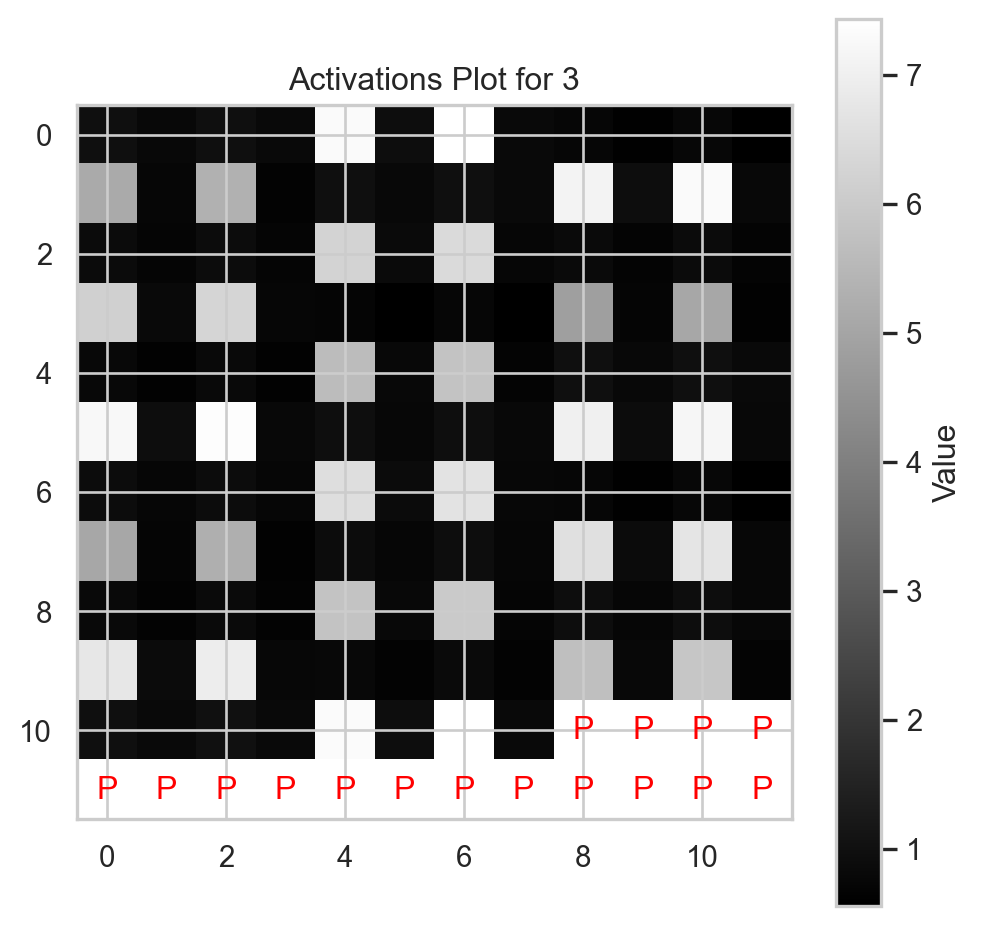

128 values in Layer 6.
16 padding values added.
144 values now in Layer 6.


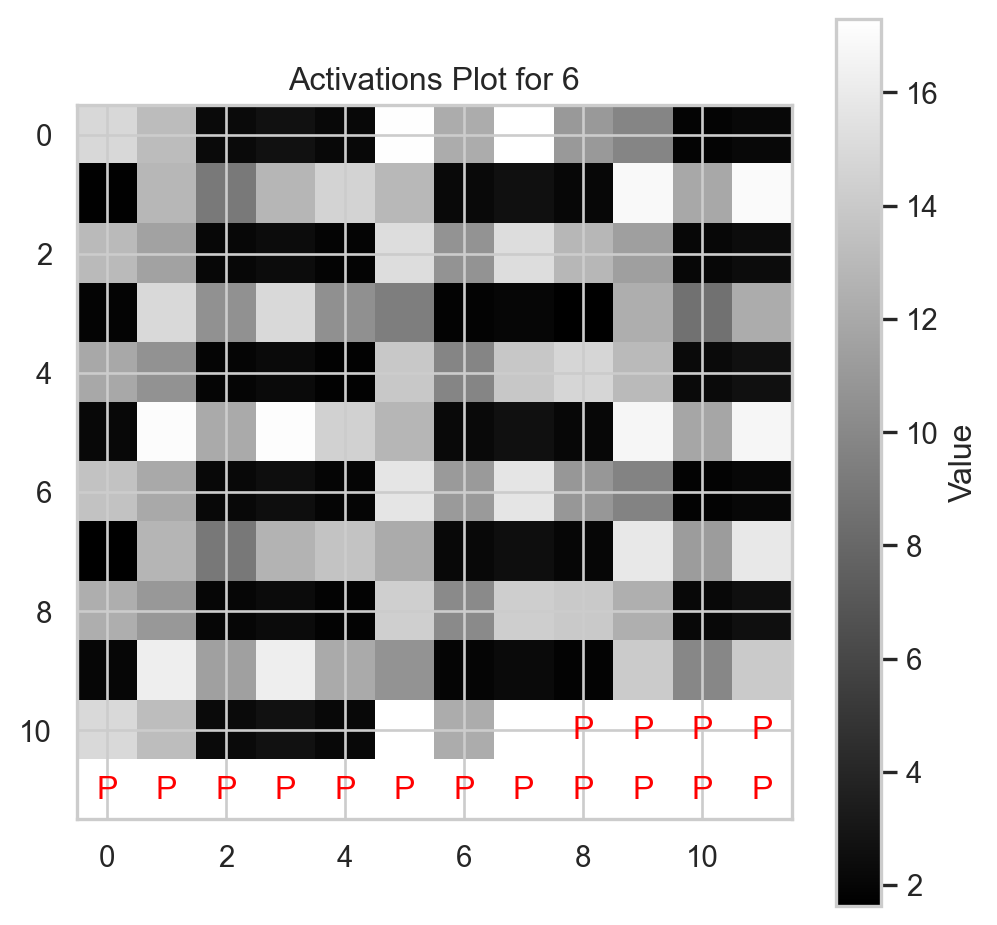

64 values in Layer 9.
64 values now in Layer 9.


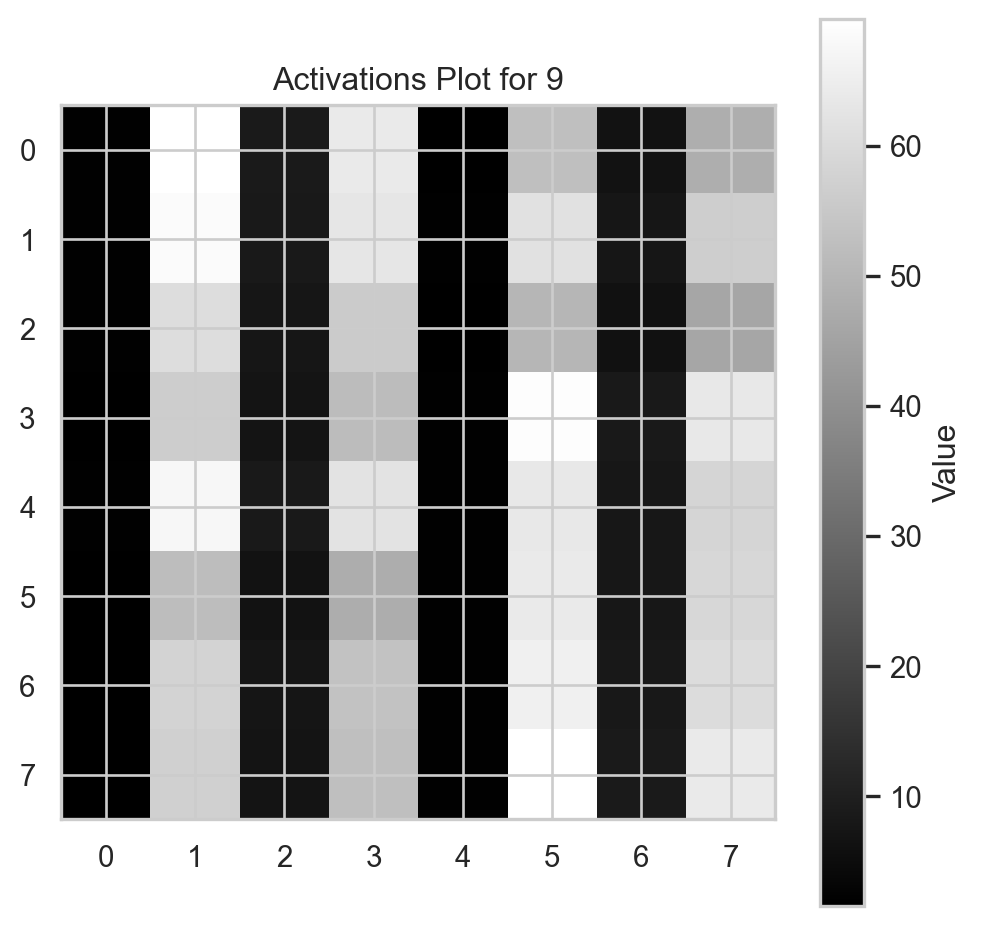

16 values in Layer 12.
16 values now in Layer 12.


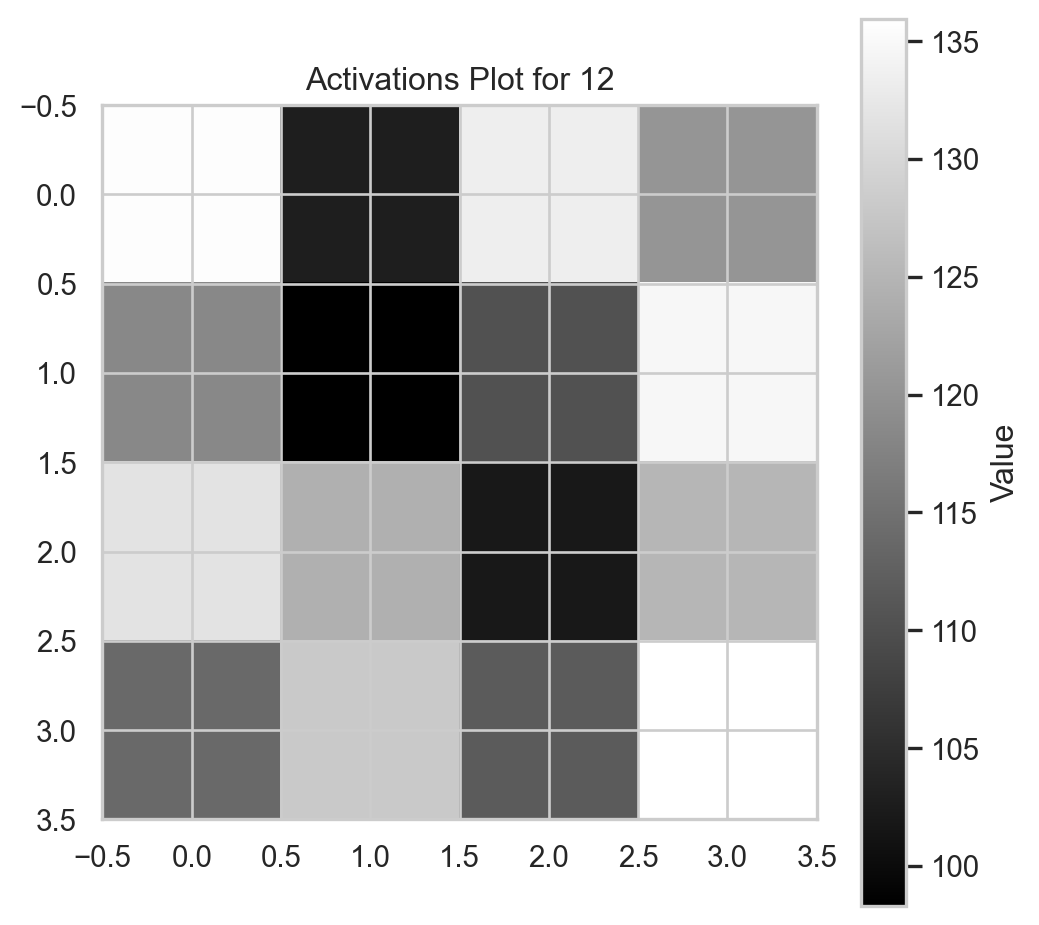

In [32]:
visualize_activations(model, fun_control=fun_control, batch_size=batch_size, device = "cpu", absolute=True)

net: NNLinearRegressor(
  (layers): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): Swish()
    (2): Dropout(p=0.20469763733360566, inplace=False)
    (3): Linear(in_features=16, out_features=8, bias=True)
    (4): Swish()
    (5): Dropout(p=0.20469763733360566, inplace=False)
    (6): Linear(in_features=8, out_features=8, bias=True)
    (7): Swish()
    (8): Dropout(p=0.20469763733360566, inplace=False)
    (9): Linear(in_features=8, out_features=4, bias=True)
    (10): Swish()
    (11): Dropout(p=0.20469763733360566, inplace=False)
    (12): Linear(in_features=4, out_features=1, bias=True)
  )
)
n:5


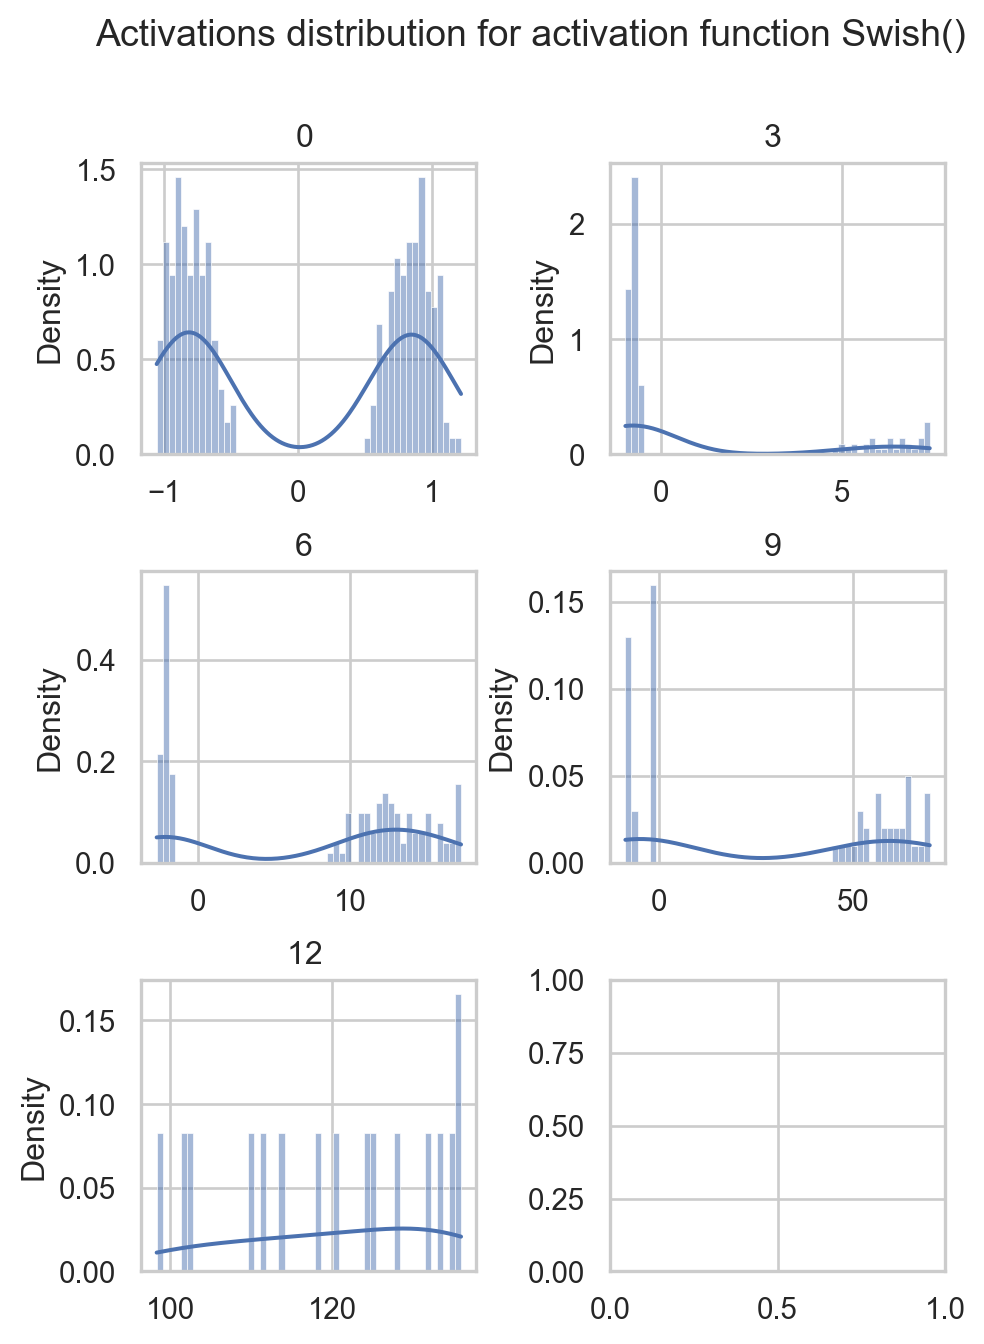

In [33]:
visualize_activations_distributions(net=model, fun_control=fun_control, batch_size=batch_size, device="cpu", color="C0", columns=2)

### Gradients


In [34]:
gradients = get_gradients(model, fun_control, batch_size, device="cpu")

160 values in Layer layers.0.weight.
9 padding values added.
169 values now in Layer layers.0.weight.


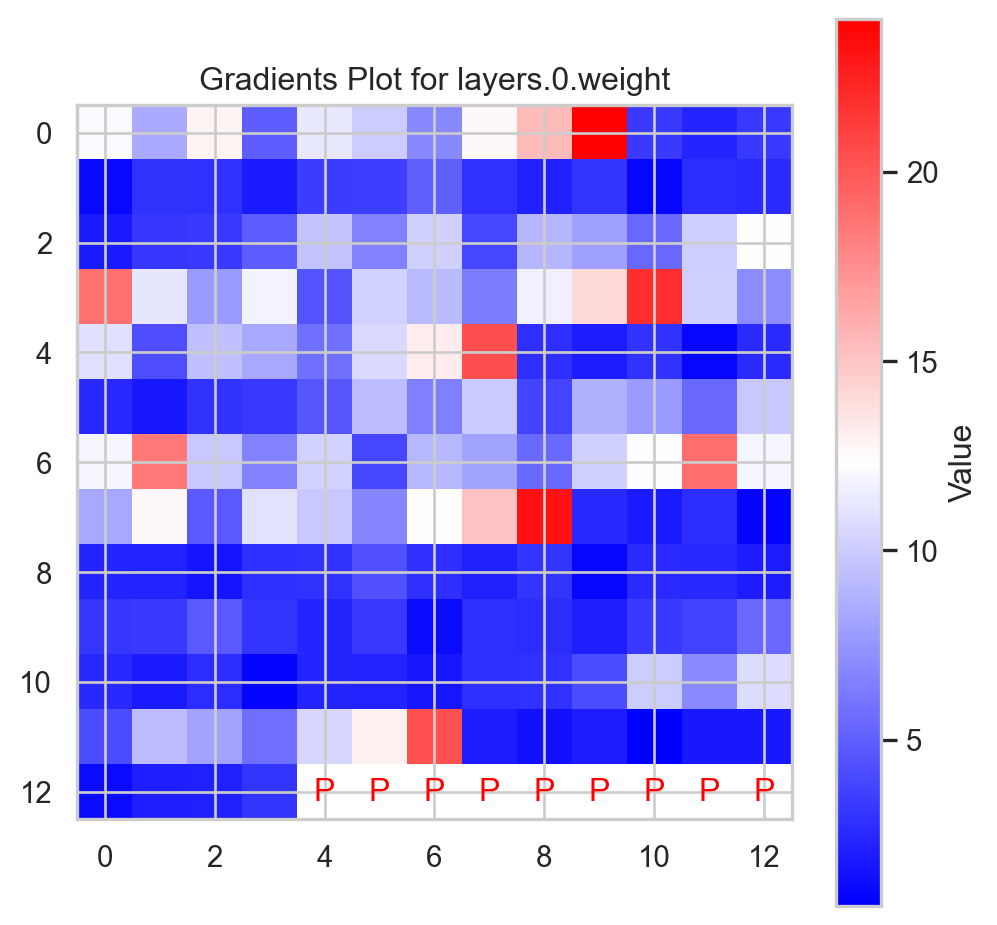

128 values in Layer layers.3.weight.
16 padding values added.
144 values now in Layer layers.3.weight.


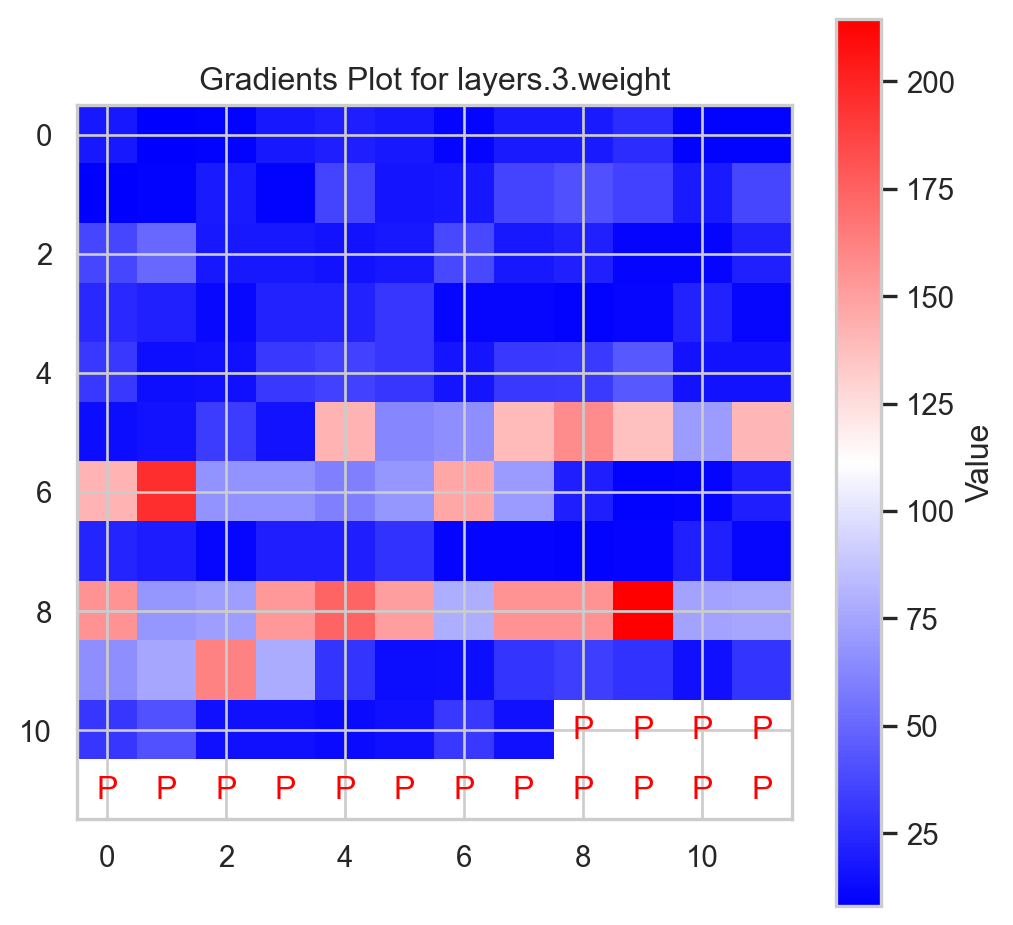

64 values in Layer layers.6.weight.
64 values now in Layer layers.6.weight.


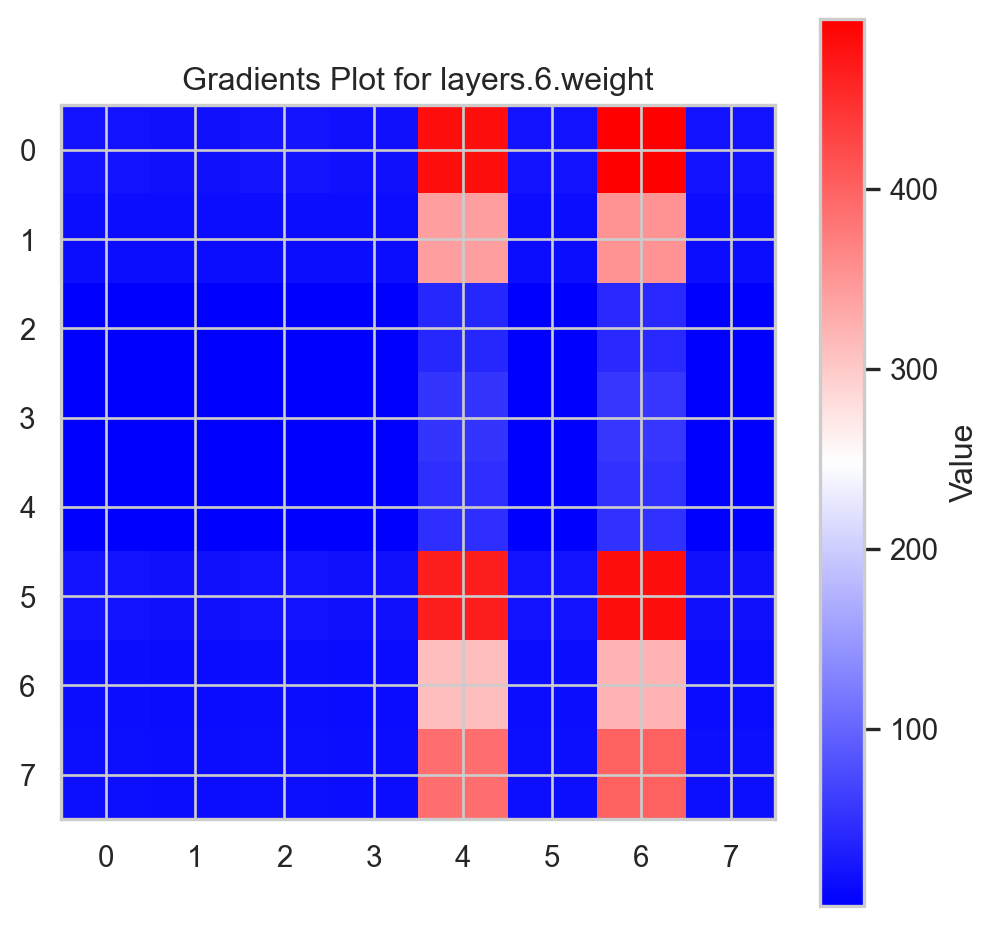

32 values in Layer layers.9.weight.
4 padding values added.
36 values now in Layer layers.9.weight.


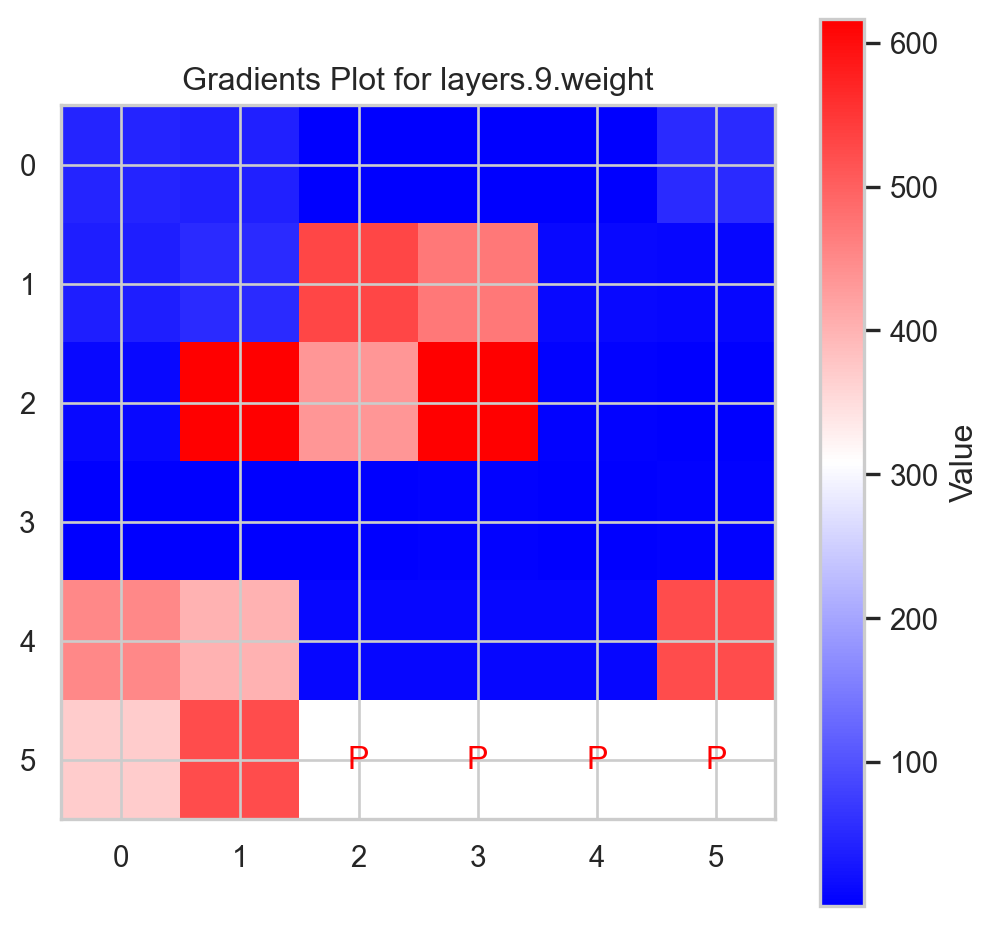

4 values in Layer layers.12.weight.
4 values now in Layer layers.12.weight.


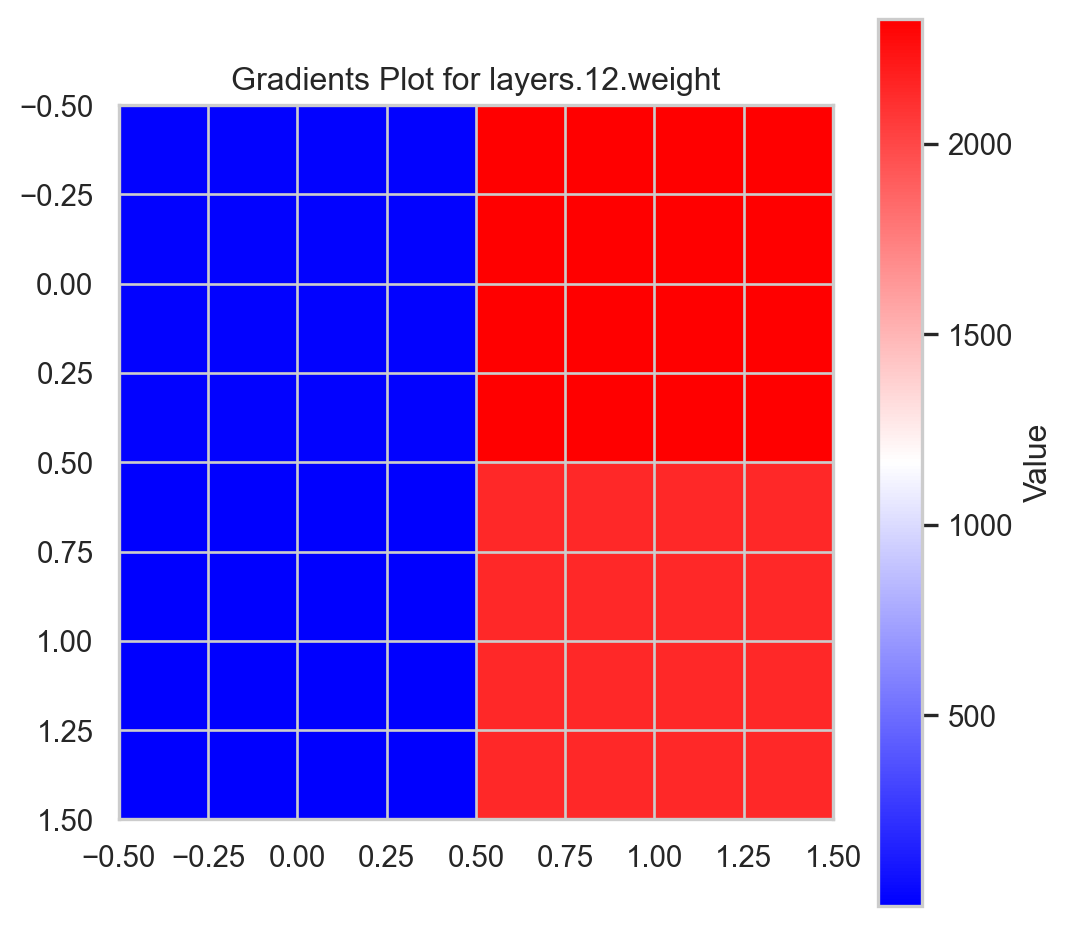

In [35]:
visualize_gradients(model, fun_control, batch_size, absolute=True, cmap="BlueWhiteRed", figsize=(6, 6))

n:5


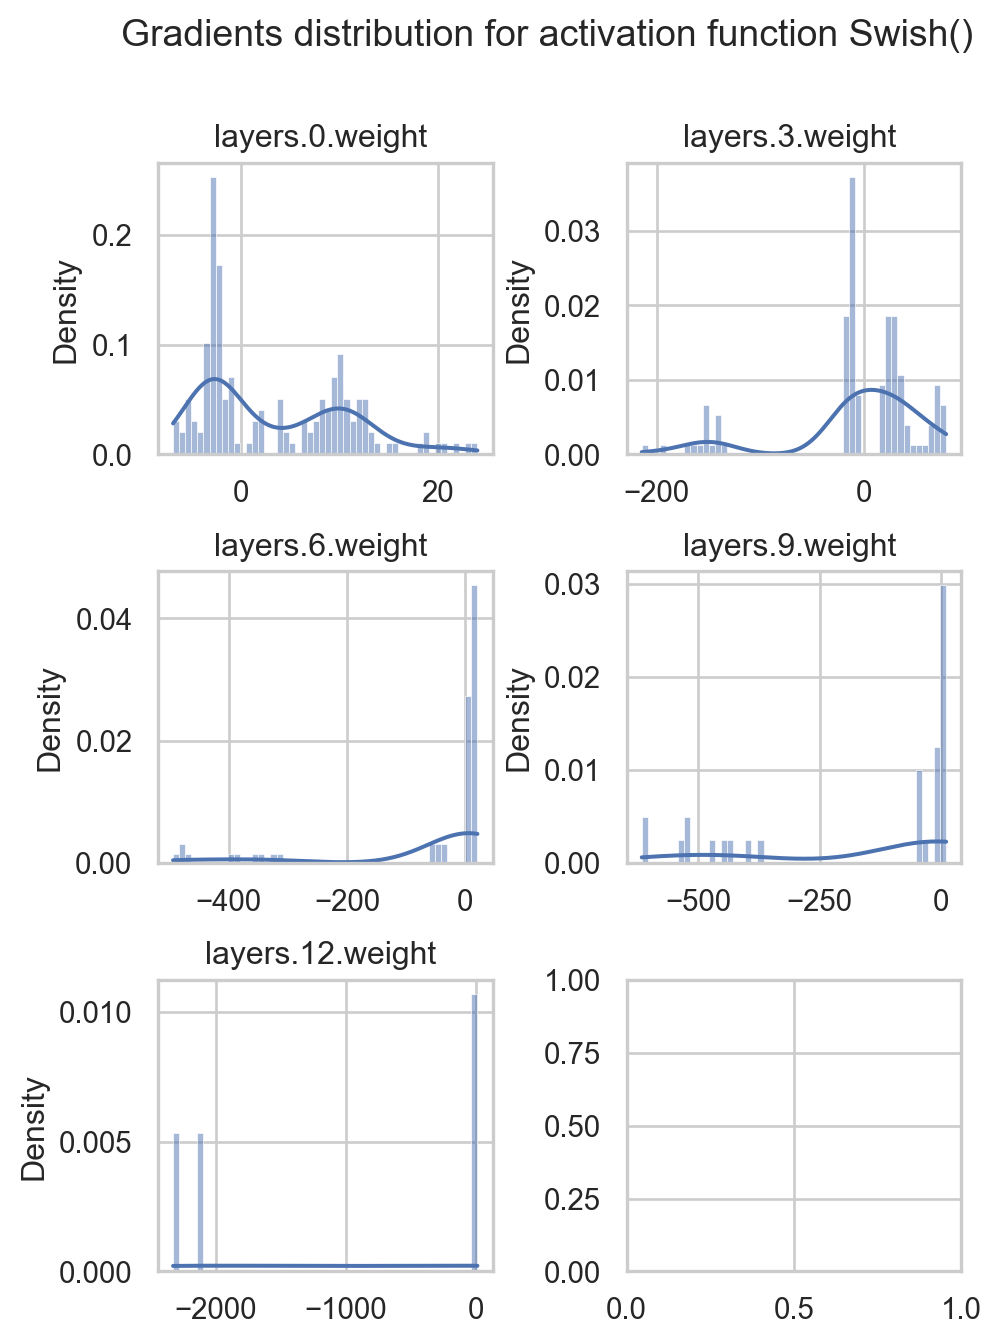

In [36]:
visualize_gradient_distributions(model, fun_control, batch_size=batch_size, color=f"C{0}")

## Layer Conductance


GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 425    | train | [16, 10] | [16, 1]  
---------------------------------------------------------------------
425       Trainable params
0         Non-trainable params
425       Total params
0.002     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


LightDataModule.setup(): stage: TrainerFn.FITTING
train_size: 0.16, val_size: 0.24 used for train & val data.
LightDataModule.val_dataloader(). Val. set size: 106
LightDataModule.train_dataloader(). data_train size: 71


LightDataModule.setup(): stage: TrainerFn.VALIDATING
LightDataModule.val_dataloader(). Val. set size: 106


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         hp_metric         │     6518.95556640625      │
│         val_loss          │     6518.95556640625      │
└───────────────────────────┴───────────────────────────┘

GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 425    | train | [16, 10] | [16, 1]  
---------------------------------------------------------------------
425       Trainable params
0         Non-trainable params
425       Total params
0.002     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


train_model result: {'val_loss': 6518.95556640625, 'hp_metric': 6518.95556640625}
config: {'l1': 16, 'epochs': 64, 'batch_size': 16, 'act_fn': Swish(), 'optimizer': 'Adamax', 'dropout_prob': 0.20469763733360566, 'lr_mult': 9.085888451953213, 'patience': 4, 'initialization': 'Default'}
Loading model with 16_64_16_Swish_Adamax_0.2047_9.0859_4_Default_TRAIN from runs/saved_models/16_64_16_Swish_Adamax_0.2047_9.0859_4_Default_TRAIN/last.ckpt
Model: NNLinearRegressor(
  (layers): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): Swish()
    (2): Dropout(p=0.20469763733360566, inplace=False)
    (3): Linear(in_features=16, out_features=8, bias=True)
    (4): Swish()
    (5): Dropout(p=0.20469763733360566, inplace=False)
    (6): Linear(in_features=8, out_features=8, bias=True)
    (7): Swish()
    (8): Dropout(p=0.20469763733360566, inplace=False)
    (9): Linear(in_features=8, out_features=4, bias=True)
    (10): Swish()
    (11): Dropout(p=0.20469763733360566

LightDataModule.setup(): stage: TrainerFn.VALIDATING
LightDataModule.val_dataloader(). Val. set size: 106


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         hp_metric         │      7127.080078125       │
│         val_loss          │      7127.080078125       │
└───────────────────────────┴───────────────────────────┘

train_model result: {'val_loss': 7127.080078125, 'hp_metric': 7127.080078125}
config: {'l1': 16, 'epochs': 64, 'batch_size': 16, 'act_fn': Swish(), 'optimizer': 'Adamax', 'dropout_prob': 0.20469763733360566, 'lr_mult': 9.085888451953213, 'patience': 4, 'initialization': 'Default'}
Loading model with 16_64_16_Swish_Adamax_0.2047_9.0859_4_Default_TRAIN from runs/saved_models/16_64_16_Swish_Adamax_0.2047_9.0859_4_Default_TRAIN/last.ckpt
Model: NNLinearRegressor(
  (layers): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): Swish()
    (2): Dropout(p=0.20469763733360566, inplace=False)
    (3): Linear(in_features=16, out_features=8, bias=True)
    (4): Swish()
    (5): Dropout(p=0.20469763733360566, inplace=False)
    (6): Linear(in_features=8, out_features=8, bias=True)
    (7): Swish()
    (8): Dropout(p=0.20469763733360566, inplace=False)
    (9): Linear(in_features=8, out_features=4, bias=True)
    (10): Swish()
    (11): Dropout(p=0.20469763733360566, in

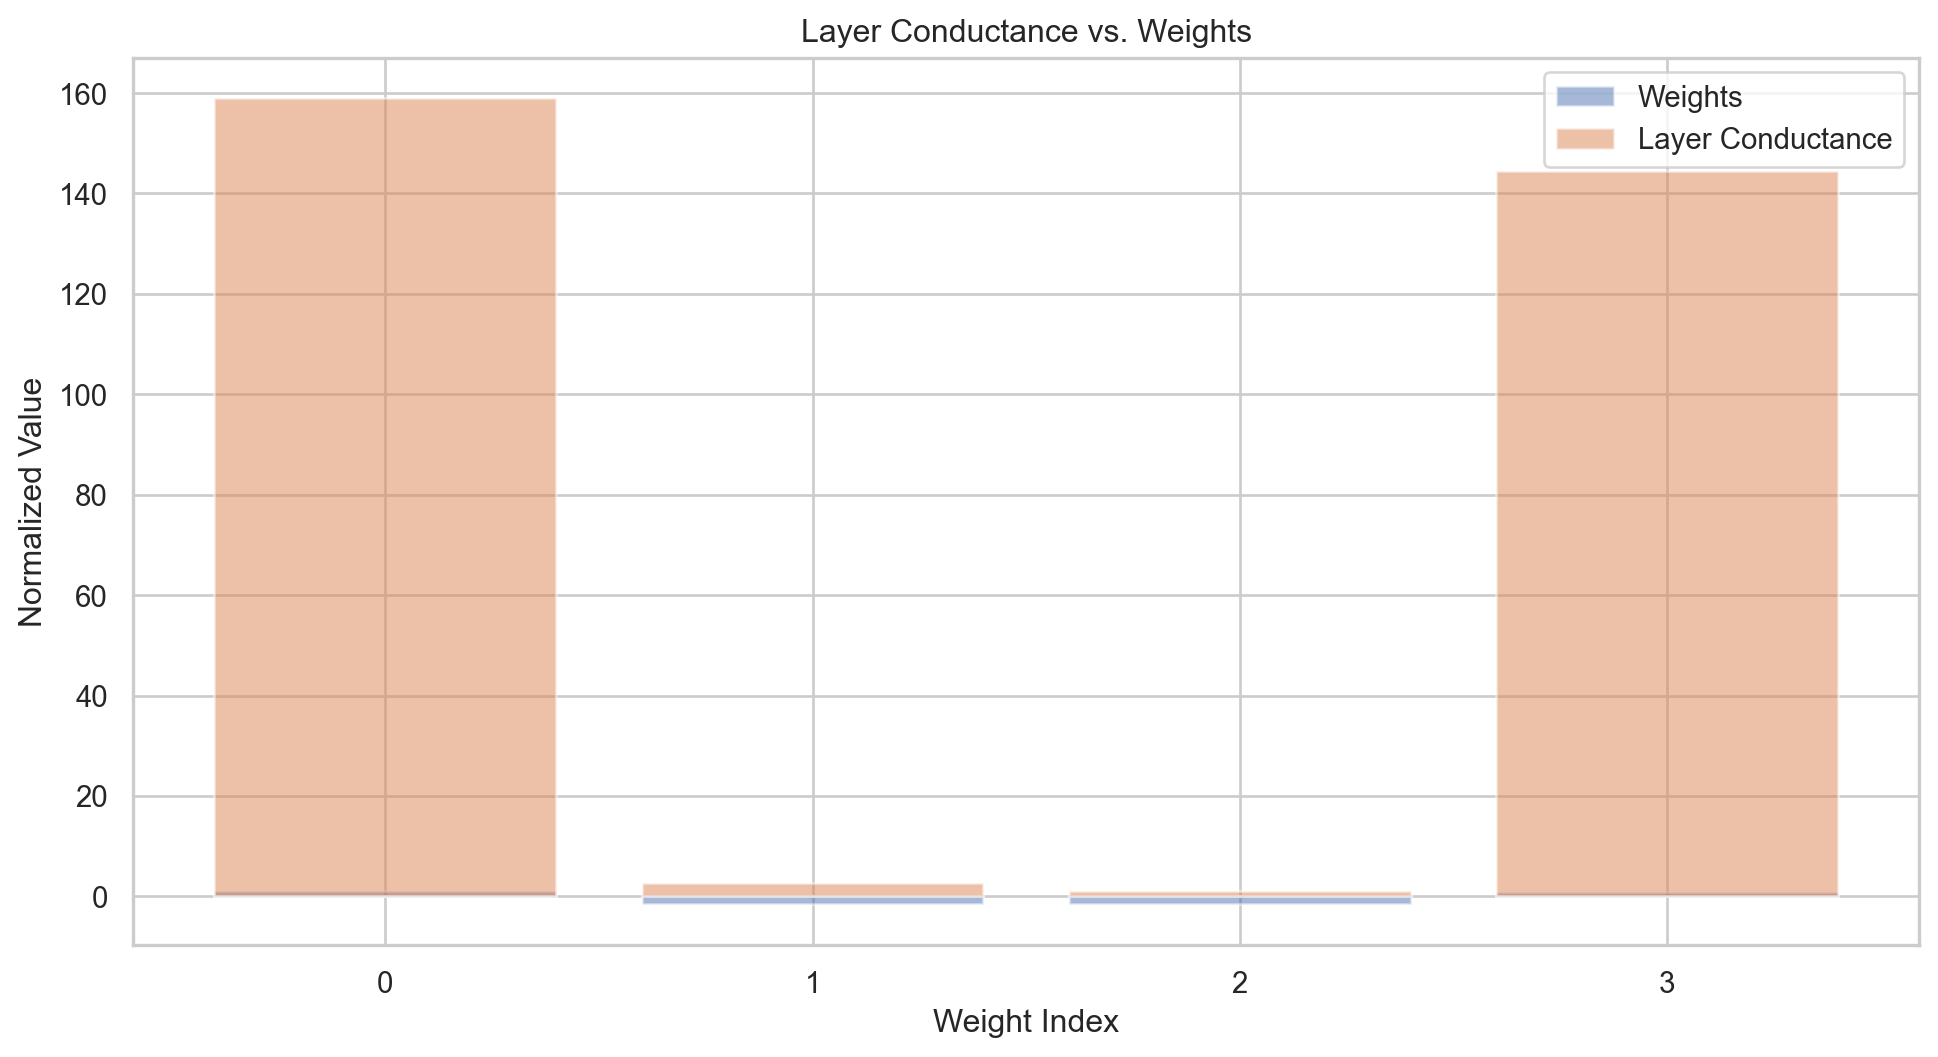

In [37]:
from spotpython.plot.xai import get_weights_conductance_last_layer, plot_conductance_last_layer
w, c = get_weights_conductance_last_layer(spot_tuner, fun_control)
plot_conductance_last_layer(w,c)

## Details of the Implementation

### Loss Function {#sec-torchmetrics-601}


The parameter `_torchmetric` is used to specify the metric. Any metric from the `torchmetrics` library can be used.
Currently, the following metrics are provided, see [[LINK]](https://lightning.ai/docs/torchmetrics/stable/all-metrics.html):

* `concordance_corrcoef`
* `cosine_similarity`
* `critical_success_index`
* `explained_variance`
* `kendall_rank_corrcoef`
* `kl_divergence`
* `log_cosh_error`
* `mean_squared_log_error`
* `mean_absolute_error`
* `mean_squared_error`
* `pearson_corrcoef`
* `mean_absolute_percentage_error`
* `mean_absolute_percentage_error`
* `minkowski_distance`
* `r2_score`
* `relative_squared_error`
* `spearman_corrcoef`
* `symmetric_mean_absolute_percentage_error`
* `tweedie_deviance_score`
* `weighted_mean_absolute_percentage_error`



 The metric is used in the training, validation, and testing steps of the model.


`NNLightRegressor` implements a loss function as follows:

```python
    def _calculate_loss(self, batch):
        """
        Calculate the loss for the given batch.

        Args:
            batch (tuple): A tuple containing a batch of input data and labels.
            mode (str, optional): The mode of the model. Defaults to "train".

        Returns:
            torch.Tensor: A tensor containing the loss for this batch.

        """
        x, y = batch
        y = y.view(len(y), 1)
        y_hat = self(x)
        loss = self.metric(y_hat, y)
        return loss
```

The loss function is used in the training, validation, and testing steps of the model.

### Data Handling {#sec-data-handling-601}

As shown below, a DataLoader from `torch.utils.data` can be used to check the data. `spotpython` implements a `DataModule` class, which is used to load the data. The `DataModule` class is called from the `fun` function. The `DataModule` class is used to load the data and to split the data into training, validation, and test sets.


In [38]:
from spotpython.data.diabetes import Diabetes
import torch
data_set = Diabetes(target_type=torch.float)
print(len(data_set))
# Set batch size for DataLoader
batch_size = 5
# Create DataLoader
from torch.utils.data import DataLoader
dataloader = DataLoader(data_set, batch_size=batch_size, shuffle=False)

# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print(f"Inputs Shape: {inputs.shape}")
    print(f"Targets Shape: {targets.shape}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

442
Batch Size: 5
Inputs Shape: torch.Size([5, 10])
Targets Shape: torch.Size([5])
---------------
Inputs: tensor([[ 0.0381,  0.0507,  0.0617,  0.0219, -0.0442, -0.0348, -0.0434, -0.0026,
          0.0199, -0.0176],
        [-0.0019, -0.0446, -0.0515, -0.0263, -0.0084, -0.0192,  0.0744, -0.0395,
         -0.0683, -0.0922],
        [ 0.0853,  0.0507,  0.0445, -0.0057, -0.0456, -0.0342, -0.0324, -0.0026,
          0.0029, -0.0259],
        [-0.0891, -0.0446, -0.0116, -0.0367,  0.0122,  0.0250, -0.0360,  0.0343,
          0.0227, -0.0094],
        [ 0.0054, -0.0446, -0.0364,  0.0219,  0.0039,  0.0156,  0.0081, -0.0026,
         -0.0320, -0.0466]])
Targets: tensor([151.,  75., 141., 206., 135.])


Information related to the data is set in the `fun_control` dictionary, see [[SOURCE]](https://sequential-parameter-optimization.github.io/spotpython/reference/spotpython/utils/init/#spotpython.utils.init.fun_control_init).
Specifically, the following parameters are set:

* `data_set`: the data set
* `num_workers`: the number of workers
* `test_size`: the size of the test set
* `test_seed`: the seed for the test set


In [39]:
from spotpython.utils.init import fun_control_init
from spotpython.data.diabetes import Diabetes
data_set = Diabetes(target_type=torch.float)
fun_control = fun_control_init(
    data_set=data_set,
    device="cpu",
    enable_progress_bar=False,
    num_workers=0,
    show_progress=True,
    test_size=0.4,
    test_seed=42,
    )

Seed set to 123


### `spotpython`'s  `LightDataModule` Class

The values from the `fun_control` dictionary are used to set up the `LightDataModule` class, see [[SOURCE]](https://sequential-parameter-optimization.github.io/spotpython/reference/spotpython/data/lightdatamodule/).
The parameter `batch_size` is a hyperparameter that can be tuned and therefore not set in the `fun_control` dictionary.


In [40]:
from spotpython.data.lightdatamodule import LightDataModule
dm = LightDataModule(
    dataset=fun_control["data_set"],
    batch_size=5,
    num_workers=fun_control["num_workers"],
    test_size=fun_control["test_size"],
    test_seed=fun_control["test_seed"],
)
dm.setup()
print(f"train_model(): Test set size: {len(dm.data_test)}")
print(f"train_model(): Train set size: {len(dm.data_train)}")

LightDataModule.setup(): stage: None
train_size: 0.36, val_size: 0.24 used for train & val data.
test_size: 0.4 used for test dataset.
test_size: 0.4 used for predict dataset.
train_model(): Test set size: 177
train_model(): Train set size: 160


The steps described above are handled by the `LightDataModule` class. This class is used to create the data loaders for the training, validation, and test sets. The `LightDataModule` class is part of the `spotpython` package.
The `LightDataModule` class provides the following methods:

* `prepare_data()`: This method is used to prepare the data set.
* `setup()`: This method is used to create the data loaders for the training, validation, and test sets.
* `train_dataloader()`: This method is used to return the data loader for the training set.
* `val_dataloader()`: This method is used to return the data loader for the validation set.
* `test_dataloader()`: This method is used to return the data loader for the test set.
* `predict_dataloader()`: This method is used to return the data loader for the prediction set.

Details of the implementation can be found in @sec-hpt-pytorch-lightning-data-30.

## HyperLight: Interfacing the Optimizer `spotpython`  with the Data, the Loss Function, and the Model

### The `HyperLight` Class Method `fun()`

The class `Hyperlight` implements the method `fun()`, which passes the hyperparameter tuning parametrizations to the neural network and the configurations to the DataModule. The `fun()` method passes one configuration to the `train_model()` method, which trains the model and returns the performance value. The performance value is then returned to the optimizer.

```python
df_eval = train_model(config, fun_control)
```

### The Method `train_model`

`train_model` trains a model using the given configuration and function control parameters.
It extracts the information from the configuration and the function control parameters and trains the model using the `Lightning` framework.
A simplified version of the `train_model` method is shown below:


In [41]:
def train_model(config: dict, fun_control: dict, timestamp: bool = True) -> float:
    _L_in = fun_control["_L_in"]
    _L_out = fun_control["_L_out"]
    _torchmetric = fun_control["_torchmetric"]
    model = fun_control["core_model"](**config, _L_in=_L_in, _L_out=_L_out, _torchmetric=_torchmetric)
    dm = LightDataModule(
        dataset=fun_control["data_set"],
        batch_size=config["batch_size"],
        num_workers=fun_control["num_workers"],
        test_size=fun_control["test_size"],
        test_seed=fun_control["test_seed"],
        scaler=fun_control["scaler"],
    )
    trainer = L.Trainer()
    trainer.fit(model=model, datamodule=dm)
    # Test best model on validation set
    result = trainer.validate(model=model, datamodule=dm)
    result = result[0]
    return result["val_loss"]

## Summary of the Lightning Training Process in `spotpython`

The following code exemplifies the workflow and shows how to combine the elements discussed so far:

* First, results from the tuning experiment ("601") are loaded.
* A `LightDataModule` object is created and the `setup()` method is called.
* Then, the `Trainer` is initialized.
* Load the NN model from the last checkpoint.
* Next, the `fit()` method is called to train the model.
* Finally, the `validate()` method is called to validate the model. The `validate()` method returns the validation loss.


In [42]:
# Load results from the experiment 601
from spotpython.utils.file import get_experiment_from_PREFIX
config, fun_control, design_control, surrogate_control, optimizer_control = get_experiment_from_PREFIX("601",return_dict=False)

In [43]:
# Create a LightDataModule object
from spotpython.data.lightdatamodule import LightDataModule
dm = LightDataModule(
    dataset=fun_control["data_set"],
    batch_size=config["batch_size"],
    num_workers=fun_control["num_workers"],
    test_size=fun_control["test_size"],
    test_seed=fun_control["test_seed"],
)
dm.setup()

LightDataModule.setup(): stage: None
train_size: 0.36, val_size: 0.24 used for train & val data.
test_size: 0.4 used for test dataset.
test_size: 0.4 used for predict dataset.


In [44]:
# Initialize the Trainer
import lightning as L
trainer = L.Trainer(enable_progress_bar=False)

GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs


In [45]:
# Load the model from the checkpoint
from spotpython.light.loadmodel import load_light_from_checkpoint
model_loaded = load_light_from_checkpoint(config, fun_control)
model = model_loaded.to("cpu")

config: {'l1': 16, 'epochs': 64, 'batch_size': 16, 'act_fn': Swish(), 'optimizer': 'Adamax', 'dropout_prob': 0.20469763733360566, 'lr_mult': 9.085888451953213, 'patience': 4, 'initialization': 'Default'}
Loading model with 16_64_16_Swish_Adamax_0.2047_9.0859_4_Default_TEST from runs/saved_models/16_64_16_Swish_Adamax_0.2047_9.0859_4_Default_TEST/last.ckpt
Model: NNLinearRegressor(
  (layers): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): Swish()
    (2): Dropout(p=0.20469763733360566, inplace=False)
    (3): Linear(in_features=16, out_features=8, bias=True)
    (4): Swish()
    (5): Dropout(p=0.20469763733360566, inplace=False)
    (6): Linear(in_features=8, out_features=8, bias=True)
    (7): Swish()
    (8): Dropout(p=0.20469763733360566, inplace=False)
    (9): Linear(in_features=8, out_features=4, bias=True)
    (10): Swish()
    (11): Dropout(p=0.20469763733360566, inplace=False)
    (12): Linear(in_features=4, out_features=1, bias=True)
  )
)


In [46]:
# Fit (train) the model
trainer.fit(model=model, datamodule=dm)


  | Name   | Type       | Params | Mode | In sizes | Out sizes
--------------------------------------------------------------------
0 | layers | Sequential | 425    | eval | [16, 10] | [16, 1]  
--------------------------------------------------------------------
425       Trainable params
0         Non-trainable params
425       Total params
0.002     Total estimated model params size (MB)
0         Modules in train mode
11        Modules in eval mode


LightDataModule.setup(): stage: TrainerFn.FITTING
train_size: 0.36, val_size: 0.24 used for train & val data.
LightDataModule.val_dataloader(). Val. set size: 106
LightDataModule.train_dataloader(). data_train size: 160


`Trainer.fit` stopped: `max_epochs=1000` reached.


In [47]:
# Validation: Test best model on validation set
result = trainer.validate(model=model, datamodule=dm)
# unlist the result (from a list of one dict)
result = result[0]
print(result["val_loss"])

LightDataModule.setup(): stage: TrainerFn.VALIDATING
LightDataModule.val_dataloader(). Val. set size: 106


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         hp_metric         │      5085.517578125       │
│         val_loss          │      5085.517578125       │
└───────────────────────────┴───────────────────────────┘

5085.517578125


## Loading a User Specified Data Set

Using a user-specified data set is straightforward. The user simply needs to provide a data set and loads is as a  `spotpython`  `CVSDataset()` class by specifying the path, filename, and target column as follows:


In [48]:
from spotpython.data.csvdataset import CSVDataset
import torch
data_set = CSVDataset(directory="./userData/",
                     filename="data.csv",
                     target_column='target',
                     feature_type=torch.float32,
                     target_type=torch.float32,
                     rmNA=True)
print(len(data_set))
# Set batch size for DataLoader
batch_size = 5
# Create DataLoader
from torch.utils.data import DataLoader
dataloader = DataLoader(data_set, batch_size=batch_size, shuffle=False)

# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print(f"Inputs Shape: {inputs.shape}")
    print(f"Targets Shape: {targets.shape}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

442
Batch Size: 5
Inputs Shape: torch.Size([5, 10])
Targets Shape: torch.Size([5])
---------------
Inputs: tensor([[ 0.0381,  0.0507,  0.0617,  0.0219, -0.0442, -0.0348, -0.0434, -0.0026,
          0.0199, -0.0176],
        [-0.0019, -0.0446, -0.0515, -0.0263, -0.0084, -0.0192,  0.0744, -0.0395,
         -0.0683, -0.0922],
        [ 0.0853,  0.0507,  0.0445, -0.0057, -0.0456, -0.0342, -0.0324, -0.0026,
          0.0029, -0.0259],
        [-0.0891, -0.0446, -0.0116, -0.0367,  0.0122,  0.0250, -0.0360,  0.0343,
          0.0227, -0.0094],
        [ 0.0054, -0.0446, -0.0364,  0.0219,  0.0039,  0.0156,  0.0081, -0.0026,
         -0.0320, -0.0466]])
Targets: tensor([151.,  75., 141., 206., 135.])


## Using a User Specified Model

As templates, we provide the following three files that allow the user to specify a model in the `/userModel` directory:
    * `my_regressor.py`
    * `my_hyperdict.json`
    * `my_hyperdict.py`

The `my_regressor.py` file contains the model class, which is a subclass of `nn.Module`. The `my_hyperdict.json` file contains the hyperparameter settings as a dictionary, which are loaded via the `my_hyperdict.py` file.


In [49]:
from spotpython.hyperparameters.values import add_core_model_to_fun_control
import sys
sys.path.insert(0, './userModel')
import my_regressor
import my_hyper_dict
add_core_model_to_fun_control(fun_control=fun_control,
                              core_model=my_regressor.MyRegressor,
                              hyper_dict=my_hyper_dict.MyHyperDict)